# <center>Coronavirus 2020</center>
<img src="coronavirus.jpg" style="width:800;height:400px;">


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
mpl.style.use('seaborn')
import itertools 
import matplotlib.cm as cm
import folium
import json
import time
from datetime import date
from branca.colormap import linear

today =date.today()
mes=today.month
dia=today.day-1
################################
hoy=str(mes)+'/'+str(dia)+'/20'#
################################

In [2]:
corona=pd.read_csv("https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv")
muertos=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recuperados=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
corona.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/18/20,5/19/20,5/20/20,5/21/20,5/22/20,5/23/20,5/24/20,5/25/20,5/26/20,5/27/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,7072,7653,8145,8676,9216,9998,10582,11173,11831,12456
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,948,949,964,969,981,989,998,1004,1029,1050
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,7201,7377,7542,7728,7918,8113,8306,8503,8697,8857
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,761,761,762,762,762,762,762,763,763,763
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,50,52,52,58,60,61,69,70,70,71


## <center>Distribución geográfica</center>

/home/jorge/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


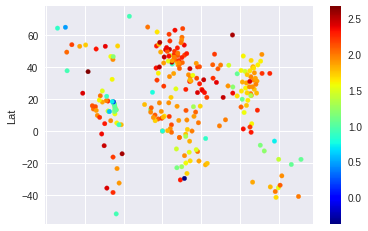

In [3]:
corona.plot(kind="scatter",x="Long",y="Lat",c=np.log(np.log(corona[hoy])),cmap=plt.get_cmap("jet"))

In [4]:
# Cargo el archivo geojson
# Inicializo un mapa
mundo=folium.Map(location=[0,0],zoom_start=2)

for i in range(0,corona.shape[0]):  # Desde 0 hasta el tamaño del df terremotos
    folium.Circle( 
      location=[corona.iloc[i]['Lat'], corona.iloc[i]['Long']],
      #popup=fechas.iloc[i],# Quería ponerle etiquetas a cada círculo cada una con la fecha y hora pero no salió :(
      radius=100**(np.log(np.log(corona.iloc[i][hoy])/np.log(2))), # El radio va exponencialmente, intenté lineal
                                                         # pero no se notaba diferencia entre círculos
      color='crimson',
      fill=True,
      fill_color='crimson'
   ).add_to(mundo)
mundo

/home/jorge/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


In [5]:
corona_map=np.log10(corona.groupby('Country/Region').sum()[hoy])
da={'contagios': corona_map}
corona_m=pd.DataFrame(da)

def cont2color(feature, corona_map):
    max=((corona_map.max()))
    colormap = linear.YlGn_09.scale(0,max)
    #print(feature["properties"]["ADMIN"])
    #print(colormap(corona_map.loc[feature["properties"]["ADMIN"]]))
    return colormap(corona_map.loc[feature["properties"]["ADMIN"]])

mapa = folium.Map(location=[0,0], zoom_start=2, tiles='OpenStreetMap')
folium.GeoJson(open("countries.geojson", encoding = 'utf-8').read(),
               style_function = lambda feature:{
                   'fillColor': cont2color(feature, corona_map),
                   'fillOpacity': 0.8,
                   'color': 'black',
                   'weight': 1 }).add_to(mapa)

mapa.save('mapa.html')

In [6]:
def localiza(x):
    if x in latinoamerica:
        return 'América Latina'
    elif x in europa:
        return 'Europa'
    elif x in norteamerica:
        return 'América del Norte'
    elif x in africa:
        return 'África'
    elif x in sudeste_asiatico:
        return 'Sudeste Asiático'
    elif x in medio_oriente:
        return 'Medio Oriente'
    elif x in ['Australia','New New Zealand']:
        return 'Oceanía'
    else:
        return 'Otros'
 


latinoamerica   =['Argentina','Brazil','Bolivia','Chile','Colombia','Costa Rica','Cuba','Ecuador','El Salvador',
                  'Dominican Republic','Honduras','Guatemala','Mexico','Nicaragua','Panama','Paraguay','Peru',
                  'Puerto Rico','Venezuela','Uruguay']
europa          =['Spain','Italy','France','Denmark','Germany','Russia','Portugal','Liechtenstein', 'Poland',
                  'Bosnia and Herzegovina' 'Slovenia','Ukraine','Norway','Sweden','United Kingdom','Finland',
                  'Belgium','Greece','Luxembourg','Switzerland','Czechia','Croatia','Austria','Georgia',
                  'North Macedonia','Romania','Estonia','San Marino','Belarus','Iceland','Lithuania',
                  'Ireland','Monaco','Azerbaijan' 'Armenia','Andorra','Latvia','Hungary','Serbia','Slovakia',
                  'Malta','Bulgaria','Albania', 'Guernsey','Cyprus','Moldova','Kosovo','Montenegro','Netherlands' ,'Uzbekistan','Holy See','Jersey']
norteamerica    =['US','Canada','Greenland' ]
sudeste_asiatico=['China','Japan','Philippines','India','Korea, South','Vietnam','Thailand','Malaysia','Cambodia',
                 'Singapore', 'Nepal', 'Malaysia','Sri Lanka','Indonesia','Bhutan','Bangladesh','Brunei' ,
                  'Taiwan*','Papua New Guinea','Guam', 'Fiji','Maldives','East Timor','Timor-Leste']
medio_oriente   =['Iran','United Arab Emirates','Iraq','Kuwait','Jordan','Qatar','Afghanistan','Saudi Arabia',
                  'Pakistan', 'Lebanon','Oman','Bahrain','Israel','Syria']
africa          =['Egypt','Algeria','South Africa','Cameroon','Congo (Kinshasa)','Turkey','Ethiopia','Sudan',
                  'Guinea','Kenya','Uganda','Republic of the Congo','Morocco','Senegal','Mauritania', 'Rwanda',
                  'Nigeria','Senegal','Tunisia','Togo' ,'Kenya','Ghana','Namibia', 'Seychelles','Gabon','Angola',
                  'Madagascar','Somalia', 'Tanzania','Zimbabwe', 'Mozambique','Mauritius', 'Zambia','Niger',
                  'Equatorial Guinea','Central African Republic', 'Congo (Brazzaville)' , 'Chad' ,'Uganda',
                  'Burkina Faso','Guinea','Cabo Verde', 'Cape Verde', 'The Gambia','Gambia, The' ,'Eritrea',
                  "Cote d'Ivoire",'Liberia','Benin','Mayotte' ,'Eswatini','Djibouti','Reunion']
oceania         =['Australia','New New Zealand']

otros           =['Martinique', 'Antigua and Barbuda', 'Haiti' ,'Barbados','Dominica' ,'Grenada','Jamaica' ,
                  'Saint Vincent and the Grenadines','The Bahamas','Bahamas, The' ,'Trinidad and Tobago',
                  'Guyana' ,'Suriname', 'Guadeloupe', 'Saint Lucia', 'French Guiana', 'Kazakhstan' , 'Mongolia','Kyrgyzstan' ,'Cruise Ship']

loc_vec=np.vectorize(localiza)

## Casos confirmados (agrupados por región y datos globales)

In [7]:
## América Latina
df_latam=corona[corona['Country/Region'].isin(latinoamerica)]
latam=df_latam.drop(['Province/State','Lat','Long'],axis='columns')
latam=latam.set_index('Country/Region')
indices_latam=latam.index
fechas_latam =latam.columns
lac=pd.DataFrame(latam.values.T,index=fechas_latam,columns=indices_latam)
lac.name='América Latina'
## Europa
df_euro=corona[corona['Country/Region'].isin(europa)]
df_euro=df_euro.drop(['Province/State','Lat','Long'],axis='columns')
df_euro=df_euro.groupby('Country/Region').sum()
indices_euro=df_euro.index
fechas_euro =df_euro.columns
euroc=pd.DataFrame(df_euro.values.T,index=fechas_euro,columns=indices_euro)
euroc.name='Europa'
## África
df_africa=corona[corona['Country/Region'].isin(africa)]
df_africa=df_africa.drop(['Province/State','Lat','Long'],axis='columns')
df_africa=df_africa.groupby('Country/Region').sum()
indices_africa=df_africa.index
fechas_africa =df_africa.columns
africc=pd.DataFrame(df_africa.values.T,index=fechas_africa,columns=indices_africa)
africc.name='África'
## Medio Oriente
df_medor=corona[corona['Country/Region'].isin(medio_oriente)]
df_medor=df_medor.drop(['Province/State','Lat','Long'],axis='columns')
df_medor=df_medor.set_index('Country/Region')
indices_medor=df_medor.index
fechas_medor =df_medor.columns
medorc=pd.DataFrame(df_medor.values.T,index=fechas_medor,columns=indices_medor)
medorc.name='Medio Oriente'
## América del Norte
df_noram=corona[corona['Country/Region'].isin(norteamerica)]
df_noram=df_noram.drop(['Province/State','Lat','Long'],axis='columns')
df_noram=df_noram.groupby('Country/Region').sum()
indices_noram=df_noram.index
fechas_noram =df_noram.columns
noramc=pd.DataFrame(df_noram.values.T,index=fechas_noram,columns=indices_noram)
noramc.name='América del Norte'
## Sudeste Asiático
df_sudas=corona[corona['Country/Region'].isin(sudeste_asiatico)]
df_sudas=df_sudas.drop(['Province/State','Lat','Long'],axis='columns')
df_sudas=df_sudas.groupby('Country/Region').sum()
indices_sudas=df_sudas.index
fechas_sudas =df_sudas.columns
sud_asc=pd.DataFrame(df_sudas.values.T,index=fechas_sudas,columns=indices_sudas)
sud_asc.name='Sudeste Asiático'
## Oceanía
df_oceania=corona[corona['Country/Region'].isin(oceania)]
df_oceania=df_oceania.drop(['Province/State','Lat','Long'],axis='columns')
df_oceania=df_oceania.groupby('Country/Region').sum()
indices_oceania=df_oceania.index
fechas_oceania =df_oceania.columns
oceaniac=pd.DataFrame(df_oceania.values.T,index=fechas_oceania,columns=indices_oceania)
oceaniac.name='Oceanía'
## Otros
df_otros=corona[corona['Country/Region'].isin(otros)]
df_otros=df_otros.drop(['Province/State','Lat','Long'],axis='columns')
df_otros=df_otros.groupby('Country/Region').sum()
indices_otros=df_otros.index
fechas_otros =df_otros.columns
otrosc=pd.DataFrame(df_otros.values.T,index=fechas_otros,columns=indices_otros)
otrosc.name='Otros'
## Datos globales
corona=corona.drop(['Province/State','Lat','Long'],axis='columns').set_index('Country/Region')
indices_corona=corona.index
fechas_corona =corona.columns
corona['Continente']=loc_vec(corona.index)
corona=corona.set_index('Continente')
corona=corona.groupby('Continente').sum()
indices_corona=corona.index
fechas_corona =corona.columns
corona=pd.DataFrame(corona.values.T, index=fechas_corona,columns=indices_corona)

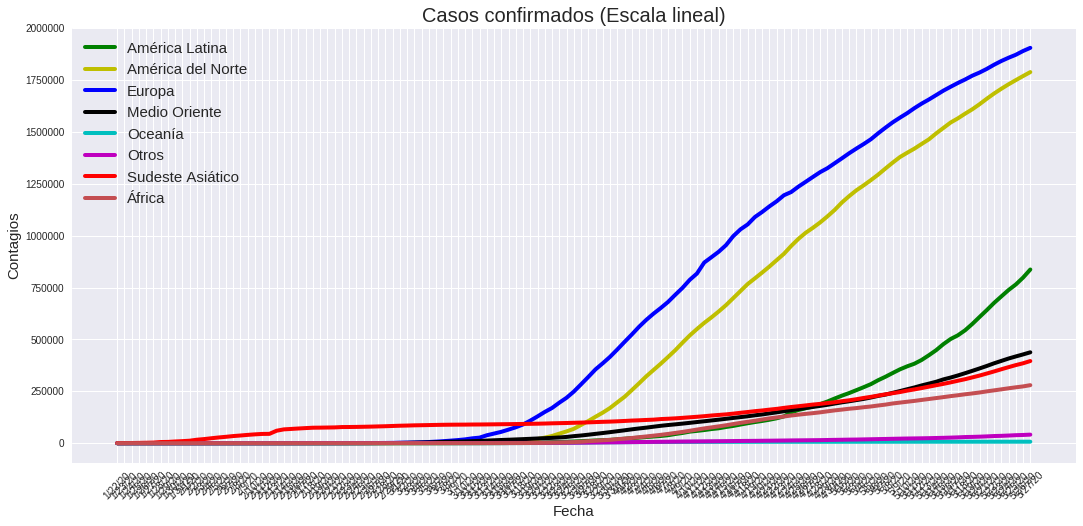

In [8]:
## Evolución total por región

colors     =['g','y','b','k','c', 'm','r','C2']
col_dic={}
for i,j in zip(corona.columns.values,colors):
    col_dic[i]=j    
    
fig=plt.figure(figsize=(18,8)) 
fig=plt.title('Casos confirmados (Escala lineal)',fontsize=20)
fig=plt.xlabel("Fecha",fontsize=15)
fig=plt.ylabel("Contagios",fontsize=15)
fig=plt.xticks(rotation=45)
#fig=plt.yscale('log')

##PONER ETIQUETAS DE LAS FECHAS IMPORTANTES, CUANDO SE PUSIERON CUARENTENAS, PARA OBSERVAR SI SIRVEN EFECTIVAMENTE O NO
for i in corona.columns:
        fig=plt.plot(corona[i][:],  color=col_dic[i],linewidth=4.0, label=i) #label=i+' LA',
#################################################################################
fig=plt.legend(fontsize=15)

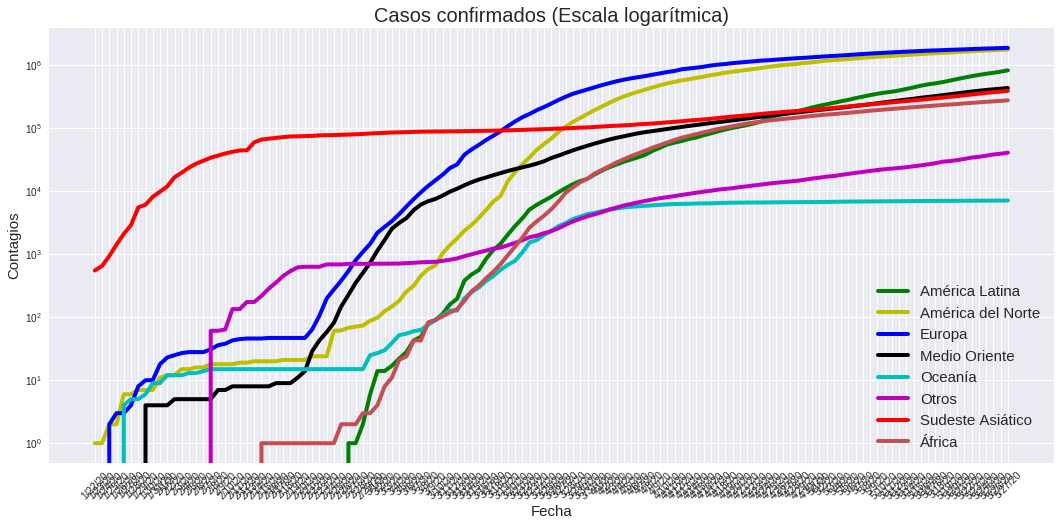

In [9]:
## Evolución total por región

mpl.style.use('seaborn')
fig=plt.figure(figsize=(18,8)) 
fig=plt.title('Casos confirmados (Escala logarítmica)',fontsize=20)
fig=plt.xlabel("Fecha",fontsize=15)
fig=plt.ylabel("Contagios",fontsize=15)
fig=plt.xticks(rotation=45)
fig=plt.yscale('log')

##PONER ETIQUETAS DE LAS FECHAS IMPORTANTES, CUANDO SE PUSIERON CUARENTENAS, PARA OBSERVAR SI SIRVEN EFECTIVAMENTE O NO
for i in corona.columns:
        fig=plt.plot(corona[i][:],  color=col_dic[i],linewidth=4.0, label=i) #label=i+' LA',
#################################################################################
fig=plt.legend(fontsize=15)

## Casos de recuperados (agrupados por región y datos globales)

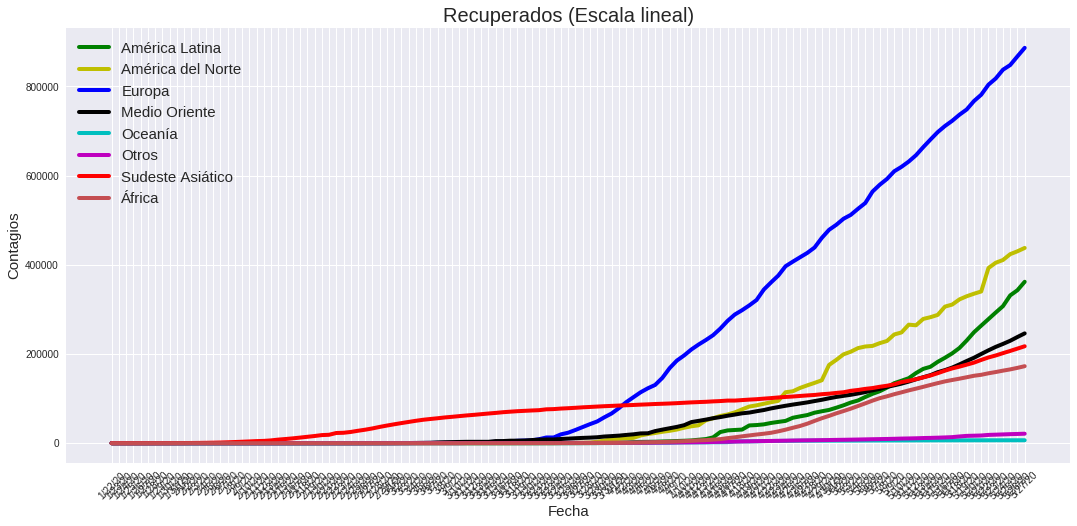

In [10]:
## América Latina
df_latam=recuperados[recuperados['Country/Region'].isin(latinoamerica)]
latam=df_latam.drop(['Province/State','Lat','Long'],axis='columns')
latam=latam.set_index('Country/Region')
indices_latam=latam.index
fechas_latam =latam.columns
lar=pd.DataFrame(latam.values.T,index=fechas_latam,columns=indices_latam)
lar.name='América Latina'
## Europa
df_euro=recuperados[recuperados['Country/Region'].isin(europa)]
df_euro=df_euro.drop(['Province/State','Lat','Long'],axis='columns')
df_euro=df_euro.groupby('Country/Region').sum()
indices_euro=df_euro.index
fechas_euro =df_euro.columns
euror=pd.DataFrame(df_euro.values.T,index=fechas_euro,columns=indices_euro)
euror.name='Europa'
## África
df_africa=recuperados[recuperados['Country/Region'].isin(africa)]
df_africa=df_africa.drop(['Province/State','Lat','Long'],axis='columns')
df_africa=df_africa.groupby('Country/Region').sum()
indices_africa=df_africa.index
fechas_africa =df_africa.columns
africr=pd.DataFrame(df_africa.values.T,index=fechas_africa,columns=indices_africa)
africr.name='África'
## Medio Oriente
df_medor=recuperados[recuperados['Country/Region'].isin(medio_oriente)]
df_medor=df_medor.drop(['Province/State','Lat','Long'],axis='columns')
df_medor=df_medor.set_index('Country/Region')
indices_medor=df_medor.index
fechas_medor =df_medor.columns
medorr=pd.DataFrame(df_medor.values.T,index=fechas_medor,columns=indices_medor)
medorr.name='Medio Oriente'
## América del Norte
df_noram=recuperados[recuperados['Country/Region'].isin(norteamerica)]
df_noram=df_noram.drop(['Province/State','Lat','Long'],axis='columns')
df_noram=df_noram.groupby('Country/Region').sum()
indices_noram=df_noram.index
fechas_noram =df_noram.columns
noramr=pd.DataFrame(df_noram.values.T,index=fechas_noram,columns=indices_noram)
noramr.name='América del Norte'
## Sudeste Asiático
df_sudas=recuperados[recuperados['Country/Region'].isin(sudeste_asiatico)]
df_sudas=df_sudas.drop(['Province/State','Lat','Long'],axis='columns')
df_sudas=df_sudas.groupby('Country/Region').sum()
indices_sudas=df_sudas.index
fechas_sudas =df_sudas.columns
sud_asr=pd.DataFrame(df_sudas.values.T,index=fechas_sudas,columns=indices_sudas)
sud_asr.name='Sudeste Asiático'
## Oceanía
df_oceania=recuperados[recuperados['Country/Region'].isin(oceania)]
df_oceania=df_oceania.drop(['Province/State','Lat','Long'],axis='columns')
df_oceania=df_oceania.groupby('Country/Region').sum()
indices_oceania=df_oceania.index
fechas_oceania =df_oceania.columns
oceaniar=pd.DataFrame(df_oceania.values.T,index=fechas_oceania,columns=indices_oceania)
oceaniar.name='Oceanía'
## Otros
df_otros=recuperados[recuperados['Country/Region'].isin(otros)]
df_otros=df_otros.drop(['Province/State','Lat','Long'],axis='columns')
df_otros=df_otros.groupby('Country/Region').sum()
indices_otros=df_otros.index
fechas_otros =df_otros.columns
otrosr=pd.DataFrame(df_otros.values.T,index=fechas_otros,columns=indices_otros)
otrosr.name='Otros'
## Recuperados globales
recuperados=recuperados.drop(['Province/State','Lat','Long'],axis='columns').set_index('Country/Region')
indices_recuperados=recuperados.index
fechas_recuperados =recuperados.columns
recuperados['Continente']=loc_vec(recuperados.index)
recuperados=recuperados.set_index('Continente')
recuperados=recuperados.groupby('Continente').sum()
indices_recuperados=recuperados.index
fechas_recuperados =recuperados.columns
recuperados=pd.DataFrame(recuperados.values.T, index=fechas_recuperados,columns=indices_recuperados)

## Recuperados ( total por región)
fig=plt.figure(figsize=(18,8)) 
fig=plt.title('Recuperados (Escala lineal)',fontsize=20)
fig=plt.xlabel("Fecha",fontsize=15)
fig=plt.ylabel("Contagios",fontsize=15)
fig=plt.xticks(rotation=45)
#fig=plt.yscale('log')

##PONER ETIQUETAS DE LAS FECHAS IMPORTANTES, CUANDO SE PUSIERON CUARENTENAS, PARA OBSERVAR SI SIRVEN EFECTIVAMENTE O NO
for i in recuperados.columns:
        fig=plt.plot(recuperados[i][:],  color=col_dic[i],linewidth=4.0, label=i) #label=i+' LA',
#################################################################################
fig=plt.legend(fontsize=15)

## <center> Casos de decesos (agrupados por región y datos globales) </center>

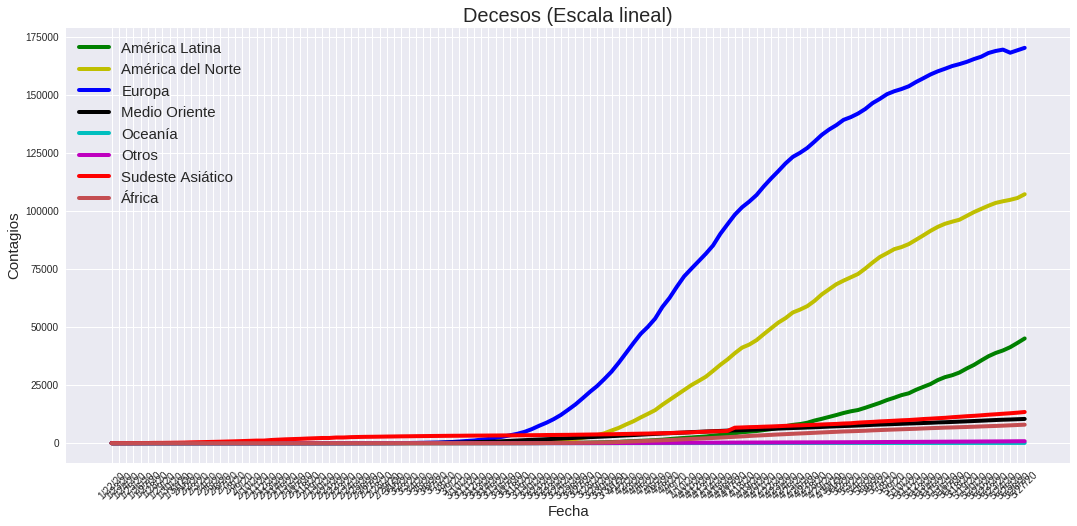

In [11]:
## América Latina
df_latam=muertos[muertos['Country/Region'].isin(latinoamerica)]
latam=df_latam.drop(['Province/State','Lat','Long'],axis='columns')
latam=latam.set_index('Country/Region')
indices_latam=latam.index
fechas_latam =latam.columns
lad=pd.DataFrame(latam.values.T,index=fechas_latam,columns=indices_latam)
lad.name='América Latina'
## Europa
df_euro=muertos[muertos['Country/Region'].isin(europa)]
df_euro=df_euro.drop(['Province/State','Lat','Long'],axis='columns')
df_euro=df_euro.groupby('Country/Region').sum()
indices_euro=df_euro.index
fechas_euro =df_euro.columns
eurod=pd.DataFrame(df_euro.values.T,index=fechas_euro,columns=indices_euro)
eurod.name='Europa'
## África
df_africa=muertos[muertos['Country/Region'].isin(africa)]
df_africa=df_africa.drop(['Province/State','Lat','Long'],axis='columns')
df_africa=df_africa.groupby('Country/Region').sum()
indices_africa=df_africa.index
fechas_africa =df_africa.columns
africd=pd.DataFrame(df_africa.values.T,index=fechas_africa,columns=indices_africa)
africd.name='África'
## Medio Oriente
df_medor=muertos[muertos['Country/Region'].isin(medio_oriente)]
df_medor=df_medor.drop(['Province/State','Lat','Long'],axis='columns')
df_medor=df_medor.set_index('Country/Region')
indices_medor=df_medor.index
fechas_medor =df_medor.columns
medord=pd.DataFrame(df_medor.values.T,index=fechas_medor,columns=indices_medor)
medord.name='Medio Oriente'
## América del Norte
df_noram=muertos[muertos['Country/Region'].isin(norteamerica)]
df_noram=df_noram.drop(['Province/State','Lat','Long'],axis='columns')
df_noram=df_noram.groupby('Country/Region').sum()
indices_noram=df_noram.index
fechas_noram =df_noram.columns
noramd=pd.DataFrame(df_noram.values.T,index=fechas_noram,columns=indices_noram)
noramd.name='América del Norte'
## Sudeste Asiático
df_sudas=muertos[muertos['Country/Region'].isin(sudeste_asiatico)]
df_sudas=df_sudas.drop(['Province/State','Lat','Long'],axis='columns')
df_sudas=df_sudas.groupby('Country/Region').sum()
indices_sudas=df_sudas.index
fechas_sudas =df_sudas.columns
sud_asd=pd.DataFrame(df_sudas.values.T,index=fechas_sudas,columns=indices_sudas)
sud_asd.name='Sudeste Asiático'
## Oceanía
df_oceania=muertos[muertos['Country/Region'].isin(oceania)]
df_oceania=df_oceania.drop(['Province/State','Lat','Long'],axis='columns')
df_oceania=df_oceania.groupby('Country/Region').sum()
indices_oceania=df_oceania.index
fechas_oceania =df_oceania.columns
oceaniad=pd.DataFrame(df_oceania.values.T,index=fechas_oceania,columns=indices_oceania)
oceaniad.name='Oceanía'
## Otros
df_otros=muertos[muertos['Country/Region'].isin(otros)]
df_otros=df_otros.drop(['Province/State','Lat','Long'],axis='columns')
df_otros=df_otros.groupby('Country/Region').sum()
indices_otros=df_otros.index
fechas_otros =df_otros.columns
otrosd=pd.DataFrame(df_otros.values.T,index=fechas_otros,columns=indices_otros)
otrosd.name='Otros'
## Muertes globales
muertos=muertos.drop(['Province/State','Lat','Long'],axis='columns').set_index('Country/Region')
indices_muertos=muertos.index
fechas_muertos =muertos.columns
muertos['Continente']=loc_vec(muertos.index)
muertos=muertos.set_index('Continente')
muertos=muertos.groupby('Continente').sum()
indices_muertos=muertos.index
fechas_muertos =muertos.columns
muertos=pd.DataFrame(muertos.values.T, index=fechas_muertos,columns=indices_muertos)
## Muertos ( total por región)
fig=plt.figure(figsize=(18,8)) 
fig=plt.title('Decesos (Escala lineal)',fontsize=20)
fig=plt.xlabel("Fecha",fontsize=15)
fig=plt.ylabel("Contagios",fontsize=15)
fig=plt.xticks(rotation=45)
#fig=plt.yscale('log')

##PONER ETIQUETAS DE LAS FECHAS IMPORTANTES, CUANDO SE PUSIERON CUARENTENAS, PARA OBSERVAR SI SIRVEN EFECTIVAMENTE O NO
for i in muertos.columns:
        fig=plt.plot(muertos[i][:],  color=col_dic[i],linewidth=4.0, label=i) #label=i+' LA',
#################################################################################
fig=plt.legend(fontsize=15)

## <center> Proporciones entre decesos y recuperados </center>

La longitud de la barra es el total de casos confirmados, de los cuales en verde son decesos y en azul pacientes recuperados

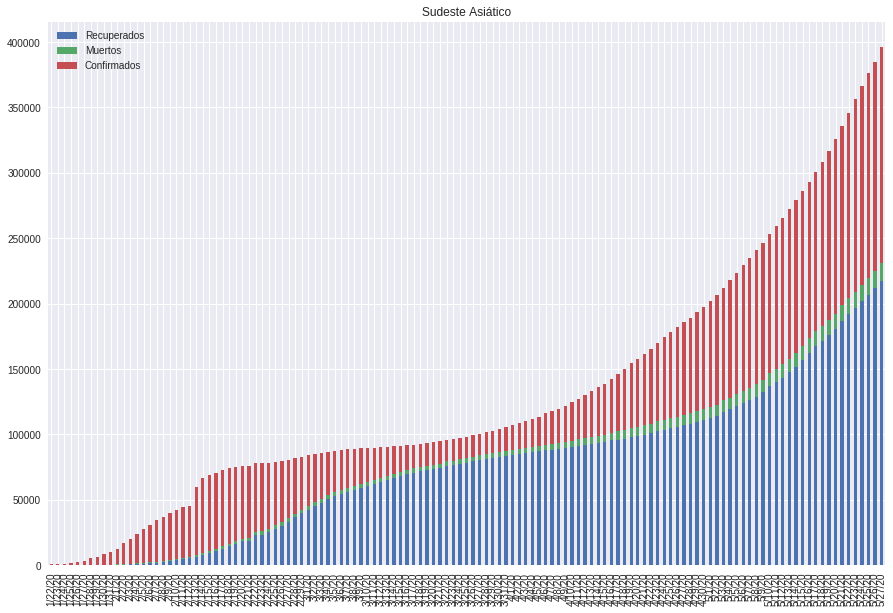

In [12]:
sudas_rec=pd.DataFrame(np.stack((recuperados.index.values,recuperados['Sudeste Asiático'].values,muertos['Sudeste Asiático'].values,
                corona['Sudeste Asiático'].values-recuperados['Sudeste Asiático'].values-muertos['Sudeste Asiático'].values),axis=1),
                columns=['Fecha','Recuperados','Muertos','Confirmados'], index=recuperados.index.values      )
sudas_rec.plot.bar(stacked=True,figsize=(15,10),title ='Sudeste Asiático',fontsize=10)

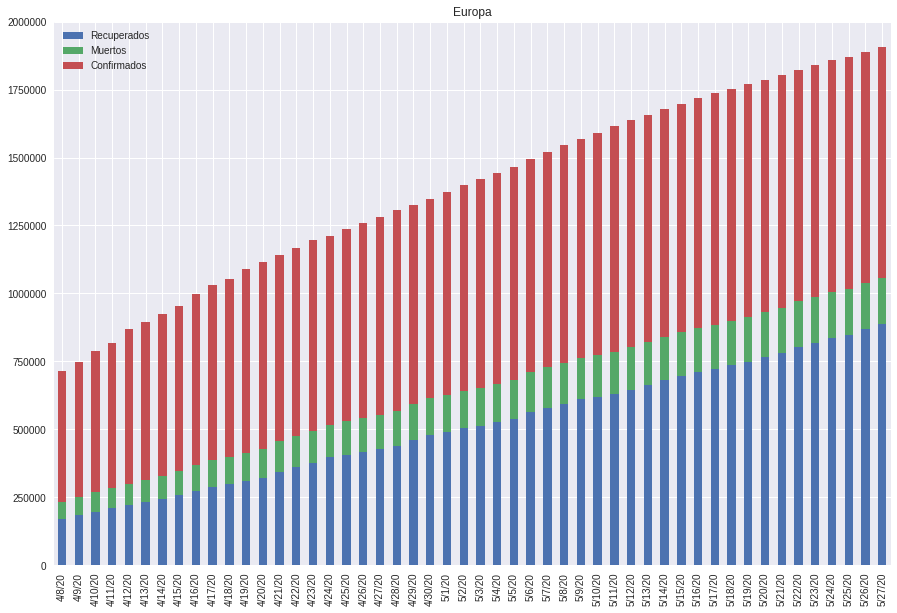

In [13]:
europa_rec=pd.DataFrame(np.stack((recuperados.index.values,recuperados['Europa'].values,muertos['Europa'].values,
                corona['Europa'].values-recuperados['Europa'].values-muertos['Europa'].values),axis=1),
                columns=['Fecha','Recuperados','Muertos','Confirmados'], index=recuperados.index.values      )
europa_rec[-50:].plot.bar(stacked=True,figsize=(15,10),title ='Europa',fontsize=10)

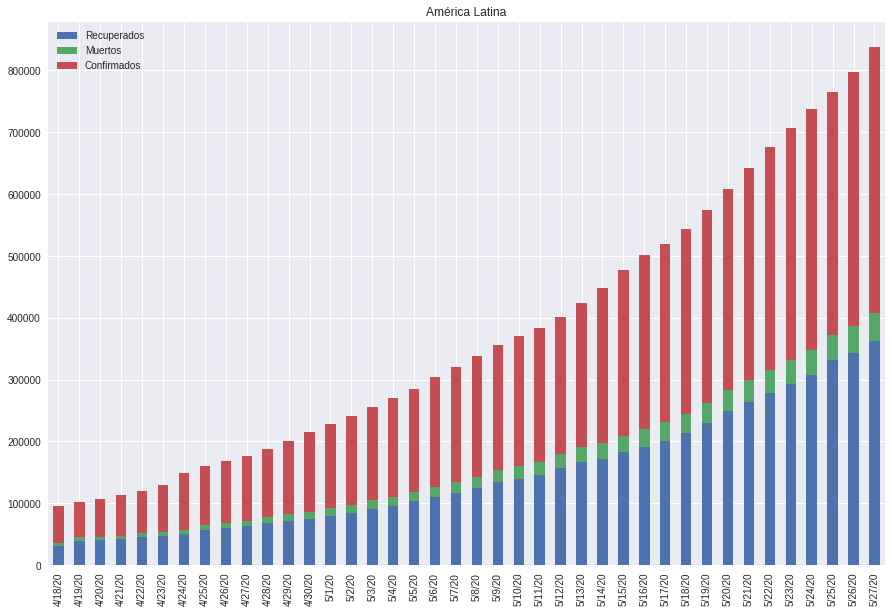

In [14]:
latam_rec=pd.DataFrame(np.stack((recuperados.index.values,recuperados['América Latina'].values,muertos['América Latina'].values,
                corona['América Latina'].values-recuperados['América Latina'].values-muertos['América Latina'].values),axis=1),
                columns=['Fecha','Recuperados','Muertos','Confirmados'], index=recuperados.index.values      )
latam_rec[-40:].plot.bar(stacked=True,figsize=(15,10),title ='América Latina',fontsize=10)

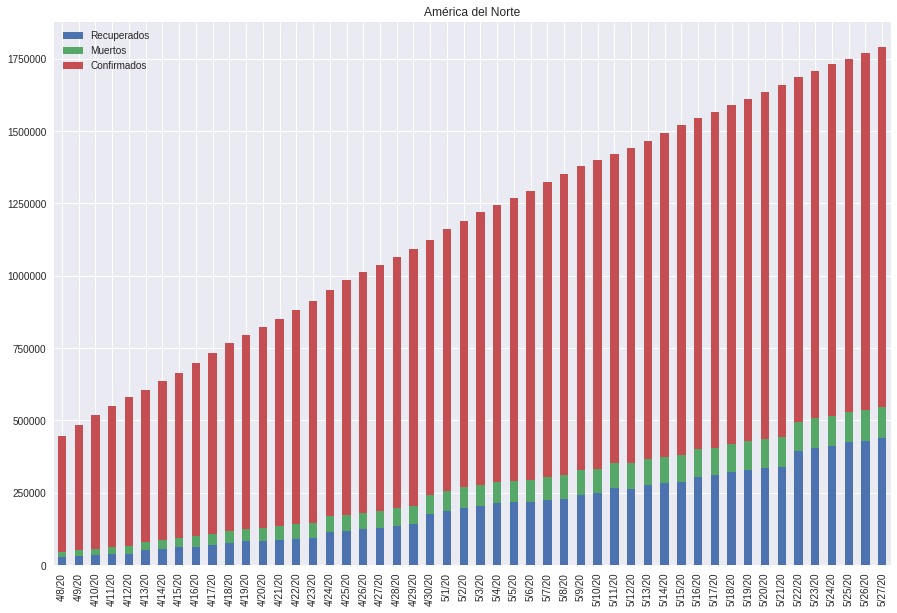

In [15]:
noram_rec=pd.DataFrame(np.stack((recuperados.index.values,recuperados['América del Norte'].values,muertos['América del Norte'].values,
                corona['América del Norte'].values-recuperados['América del Norte'].values-muertos['América del Norte'].values),axis=1),
                columns=['Fecha','Recuperados','Muertos','Confirmados'], index=recuperados.index.values      )
noram_rec[-50:].plot.bar(stacked=True,figsize=(15,10),title ='América del Norte',fontsize=10)

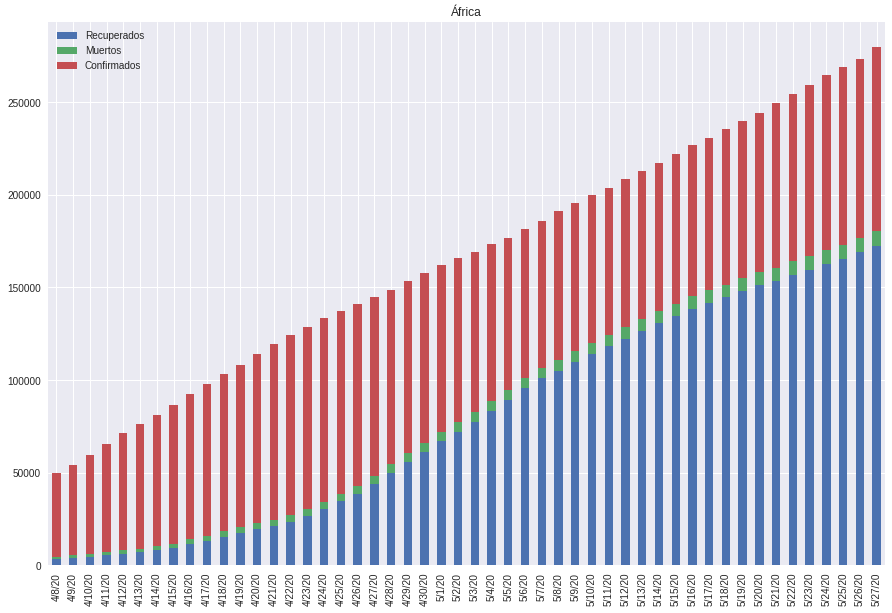

In [16]:
africa_rec=pd.DataFrame(np.stack((recuperados.index.values,recuperados['África'].values,muertos['África'].values,
                corona['África'].values-recuperados['África'].values-muertos['África'].values),axis=1),
                columns=['Fecha','Recuperados','Muertos','Confirmados'], index=recuperados.index.values      )
africa_rec[-50:].plot.bar(stacked=True,figsize=(15,10),title ='África',fontsize=10)

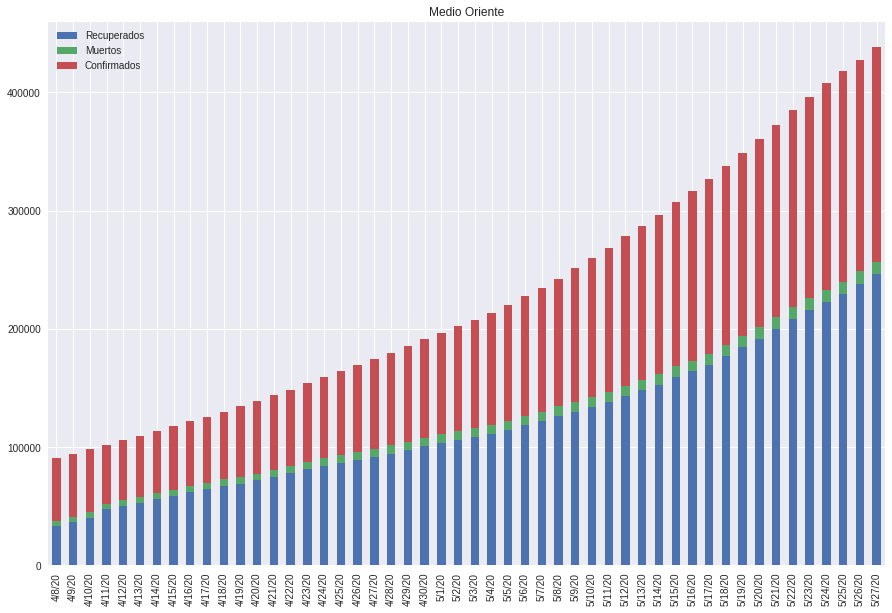

In [17]:
medor_rec=pd.DataFrame(np.stack((recuperados.index.values,recuperados['Medio Oriente'].values,muertos['Medio Oriente'].values,
                corona['Medio Oriente'].values-recuperados['Medio Oriente'].values-muertos['Medio Oriente'].values),axis=1),
                columns=['Fecha','Recuperados','Muertos','Confirmados'], index=recuperados.index.values      )
medor_rec[-50:].plot.bar(stacked=True,figsize=(15,10),title ='Medio Oriente',fontsize=10)

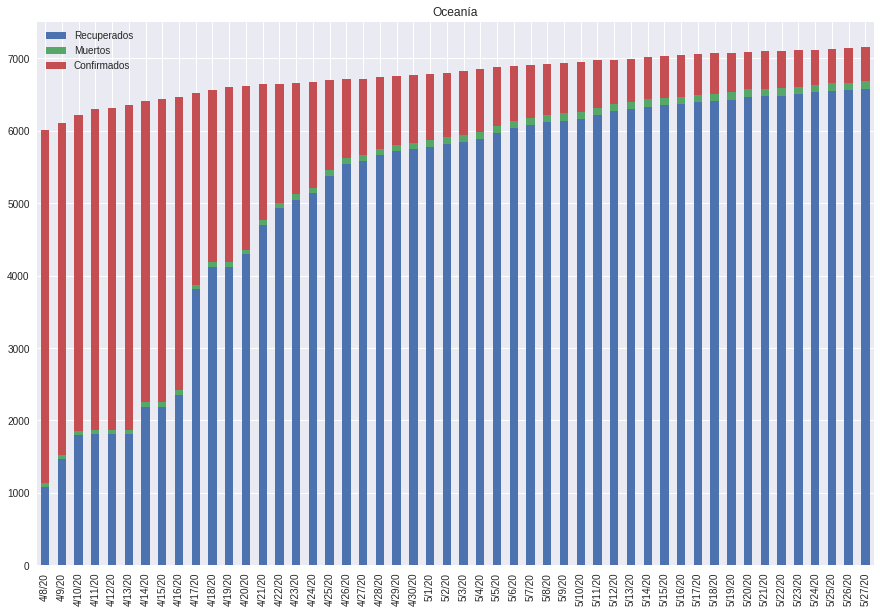

In [18]:
oceania_rec=pd.DataFrame(np.stack((recuperados.index.values,recuperados['Oceanía'].values,muertos['Oceanía'].values,
                corona['Oceanía'].values-recuperados['Oceanía'].values-muertos['Oceanía'].values),axis=1),
                columns=['Fecha','Recuperados','Muertos','Confirmados'], index=recuperados.index.values      )
oceania_rec[-50:].plot.bar(stacked=True,figsize=(15,10),title ='Oceanía',fontsize=10)

## <center> Comparación entre la propagación en las regiones </center>

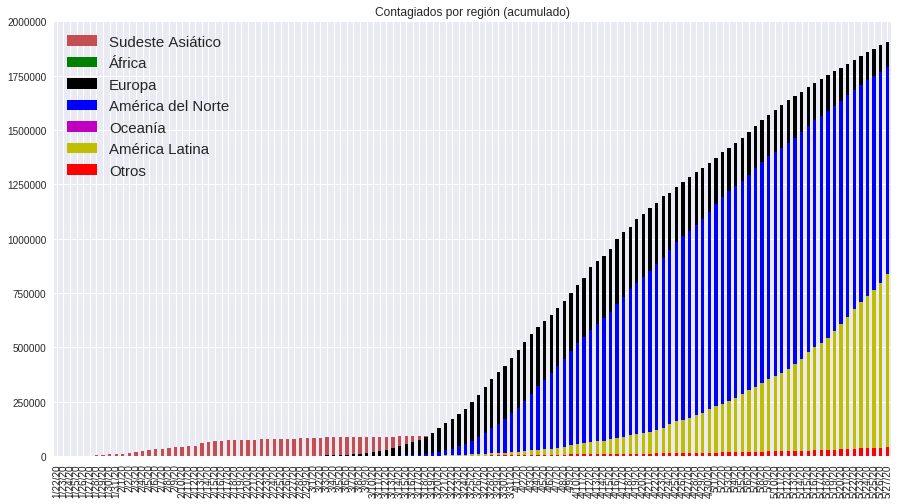

In [19]:
corona['Sudeste Asiático'].plot.bar(figsize=(15,8),label ='Sudeste Asiático',fontsize=10,color='C2') 
corona['África'].plot.bar(figsize=(15,8),title ='África',fontsize=10,color='g') 
corona['Europa'].plot.bar(figsize=(15,8),title ='Sudeste Asiático',fontsize=10,color='k') 
corona['América del Norte'].plot.bar(figsize=(15,8),title ='América del Norte',fontsize=10,color='b') 
corona['Oceanía'].plot.bar(figsize=(15,8),title ='Oceanía',fontsize=10,color='m') 
corona['América Latina'].plot.bar(figsize=(15,8),title ='América Latina',fontsize=10,color='y') 
corona['Otros'].plot.bar(figsize=(15,8),title ='Contagiados por región (acumulado)',fontsize=10,color='r') 
fig=plt.legend(fontsize=15)

## <center> Proporción de enfermos (total) </center>


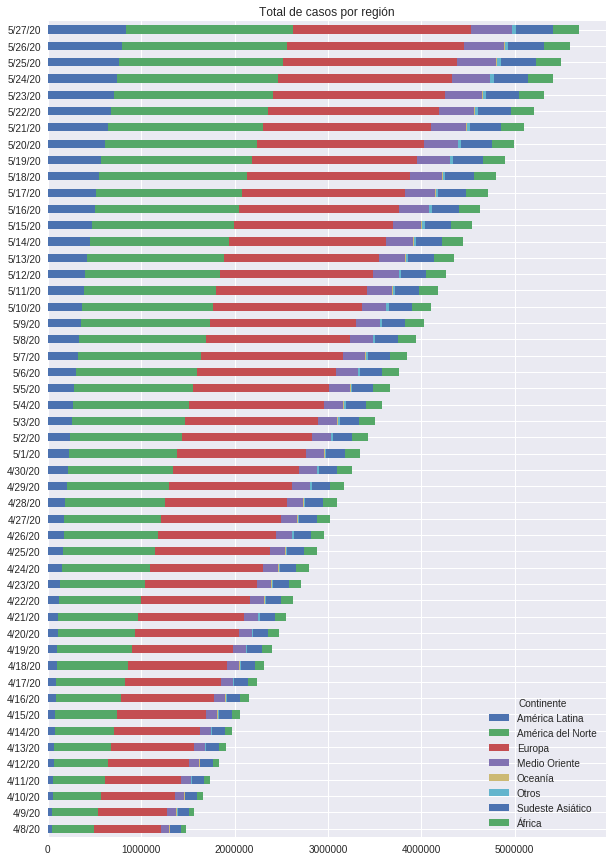

In [20]:
fig=corona[-50:].plot.barh(stacked=True,figsize=(10,15),title ='Total de casos por región',fontsize=10) #,alpha=5)

## <center> Proporción de recuperados </center>

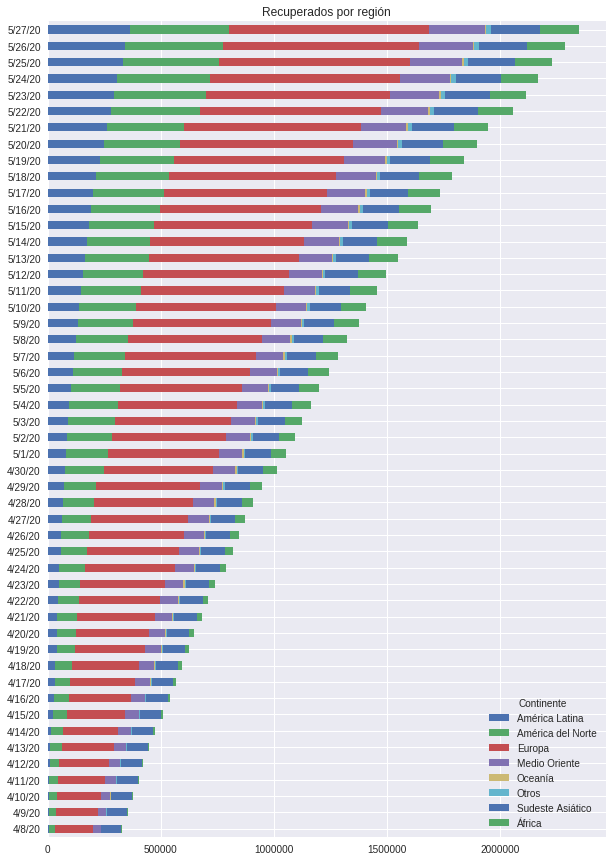

In [21]:
fig=recuperados[-50:].plot.barh(stacked=True,figsize=(10,15),title ='Recuperados por región',fontsize=10) #,alpha=5)

## <center> Proporción de muertos </center>

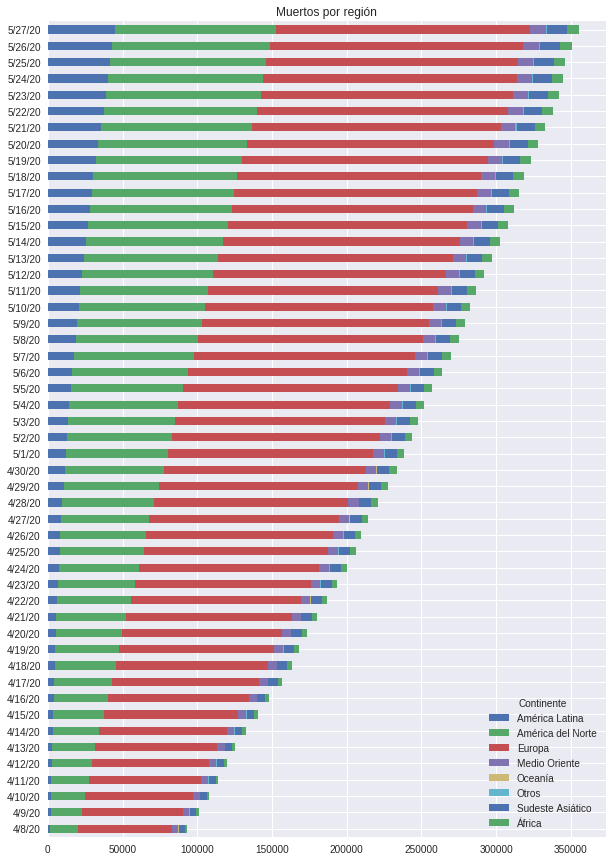

In [22]:
fig=muertos[-50:].plot.barh(stacked=True,figsize=(10,15),title ='Muertos por región',fontsize=10) #,alpha=5)

# <center> América Latina </center>

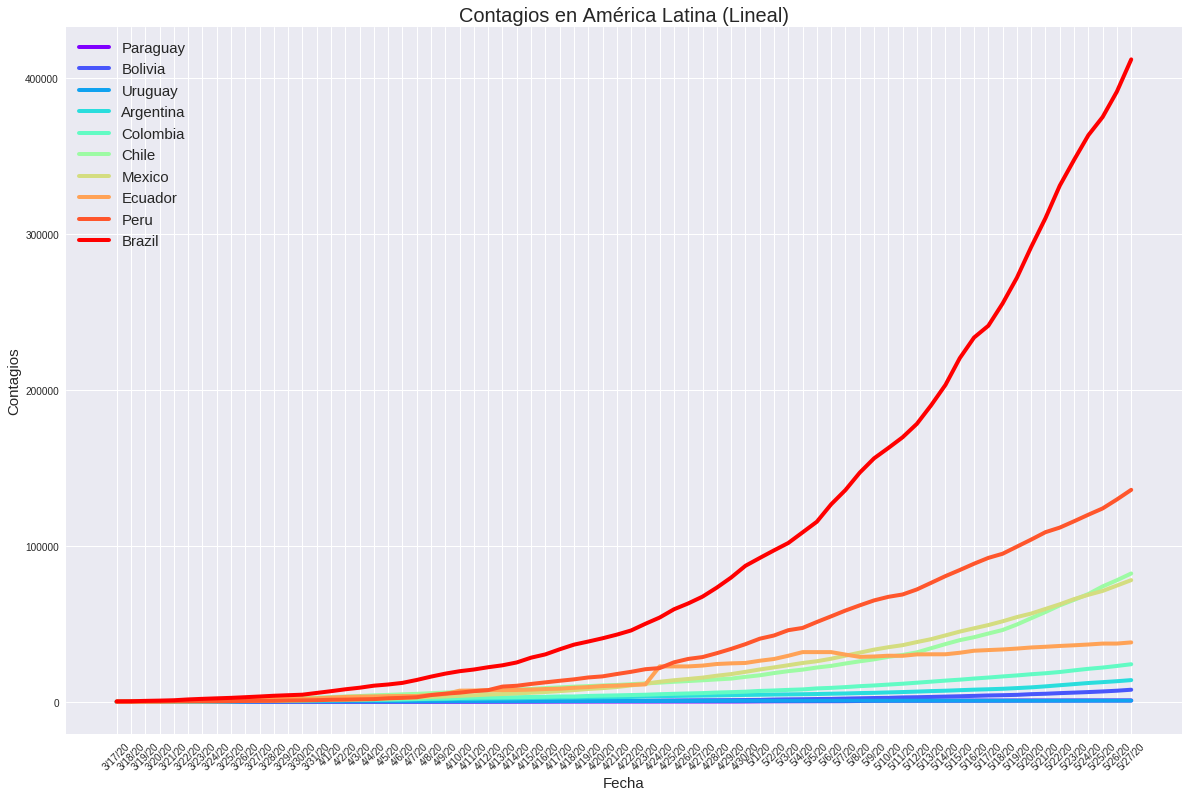

In [23]:
fig=plt.figure(figsize=(20,13)) 
fig=plt.title('Contagios en América Latina (Lineal)',fontsize=20)
fig=plt.xlabel("Fecha",fontsize=15)
fig=plt.ylabel("Contagios",fontsize=15)
fig=plt.xticks(rotation=45)
#plt.xticks(la.index)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#fig=plt.yscale('log')
p=['Brazil','Peru','Ecuador','Mexico','Chile','Colombia','Argentina','Uruguay','Bolivia','Paraguay']
paises=p[::-1]
cols= cm.rainbow(np.linspace(0, 1, len(paises))) 

for j, c in zip(paises,cols):
        fig=plt.plot(lac[55:][j],color=c,linewidth=4.0) 
fig=plt.legend(fontsize=15)


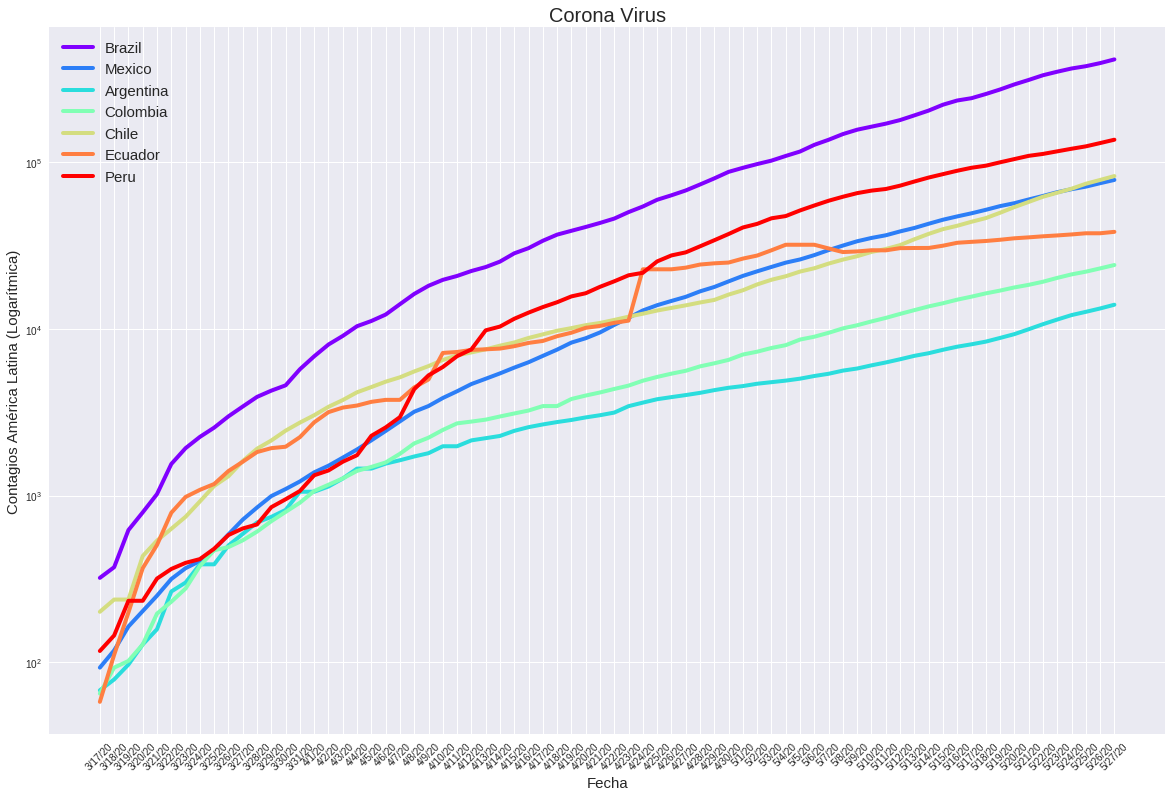

In [24]:
fig=plt.figure(figsize=(20,13)) 
fig=plt.title('Corona Virus',fontsize=20)
fig=plt.xlabel("Fecha",fontsize=15)
fig=plt.ylabel("Contagios América Latina (Logarítmica)",fontsize=15)
fig=plt.xticks(rotation=45)
#plt.xticks(la.index)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
fig=plt.yscale('log')
paises=['Brazil','Mexico','Argentina','Colombia','Chile','Ecuador','Peru']
cols= cm.rainbow(np.linspace(0, 1, len(paises))) # itertools.cycle(["r", "b", "g"]) 

##PONER ETIQUETAS DE LAS FECHAS IMPORTANTES, CUANDO SE PUSIERON CUARENTENAS, PARA OBSERVAR SI SIRVEN EFECTIVAMENTE O NO
for j, c in zip(paises,cols):
        fig=plt.plot(lac[55:][j],color=c,linewidth=4.0) #primer caso detectado [32:]
#################################################################################
#fig=plt.annotate('Primer caso detectado',xytext=(3,300),xy=(3, 30),size=15,
 #               arrowprops=dict(
  #                           color='blue',
   #                          lw=2.5,
    #                         ls='-'))

fig=plt.legend(fontsize=15)

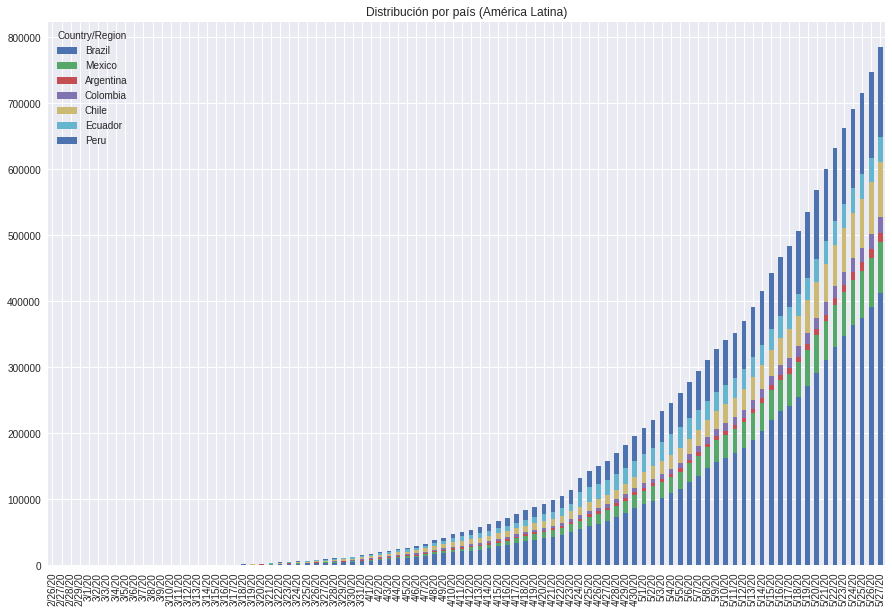

In [25]:
fig=lac[paises][35:].plot.bar(stacked=True,figsize=(15,10),title ='Distribución por país (América Latina)',fontsize=10) #,alpha=5)

In [26]:
(lac.loc[hoy]/lac.loc[hoy].sum()*100)

Country/Region
Argentina              1.664755
Bolivia                0.928143
Brazil                49.205558
Chile                  9.832127
Colombia               2.880015
Costa Rica             0.117571
Cuba                   0.235859
Dominican Republic     1.878629
Ecuador                4.552656
El Salvador            0.251989
Guatemala              0.495257
Honduras               0.554401
Mexico                 9.322413
Nicaragua              0.090688
Panama                 1.401295
Paraguay               0.105623
Peru                  16.238321
Uruguay                0.095945
Venezuela              0.148756
Name: 5/27/20, dtype: float64

# <center> América del Norte </center>

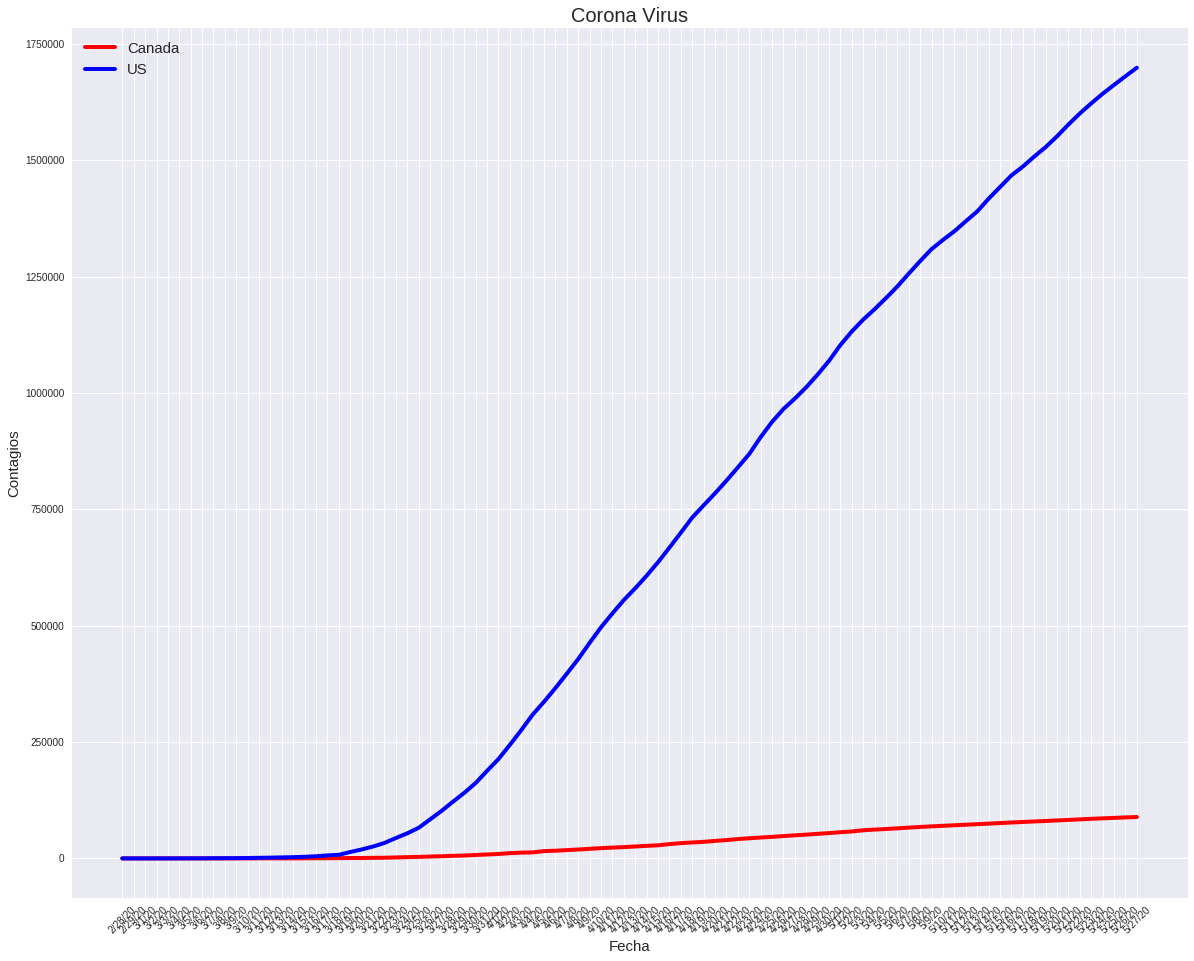

In [27]:
fig=plt.figure(figsize=(20,16)) 
fig=plt.title('Corona Virus',fontsize=20)
fig=plt.xlabel("Fecha",fontsize=15)
fig=plt.ylabel("Contagios",fontsize=15)
fig=plt.xticks(rotation=45)
import matplotlib.cm as cm
#plt.xticks(la.index)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#fig=plt.yscale('log')
cols=  itertools.cycle(["r", "b", "g"])

##PONER ETIQUETAS DE LAS FECHAS IMPORTANTES, CUANDO SE PUSIERON CUARENTENAS, PARA OBSERVAR SI SIRVEN EFECTIVAMENTE O NO
for j, c in zip(noramc.columns,cols):
        fig=plt.plot(noramc[37:][j],color=c,linewidth=4.0) #label=i+' LA',
#################################################################################
fig=plt.legend(fontsize=15)

# <center> Sudeste Asiático </center>

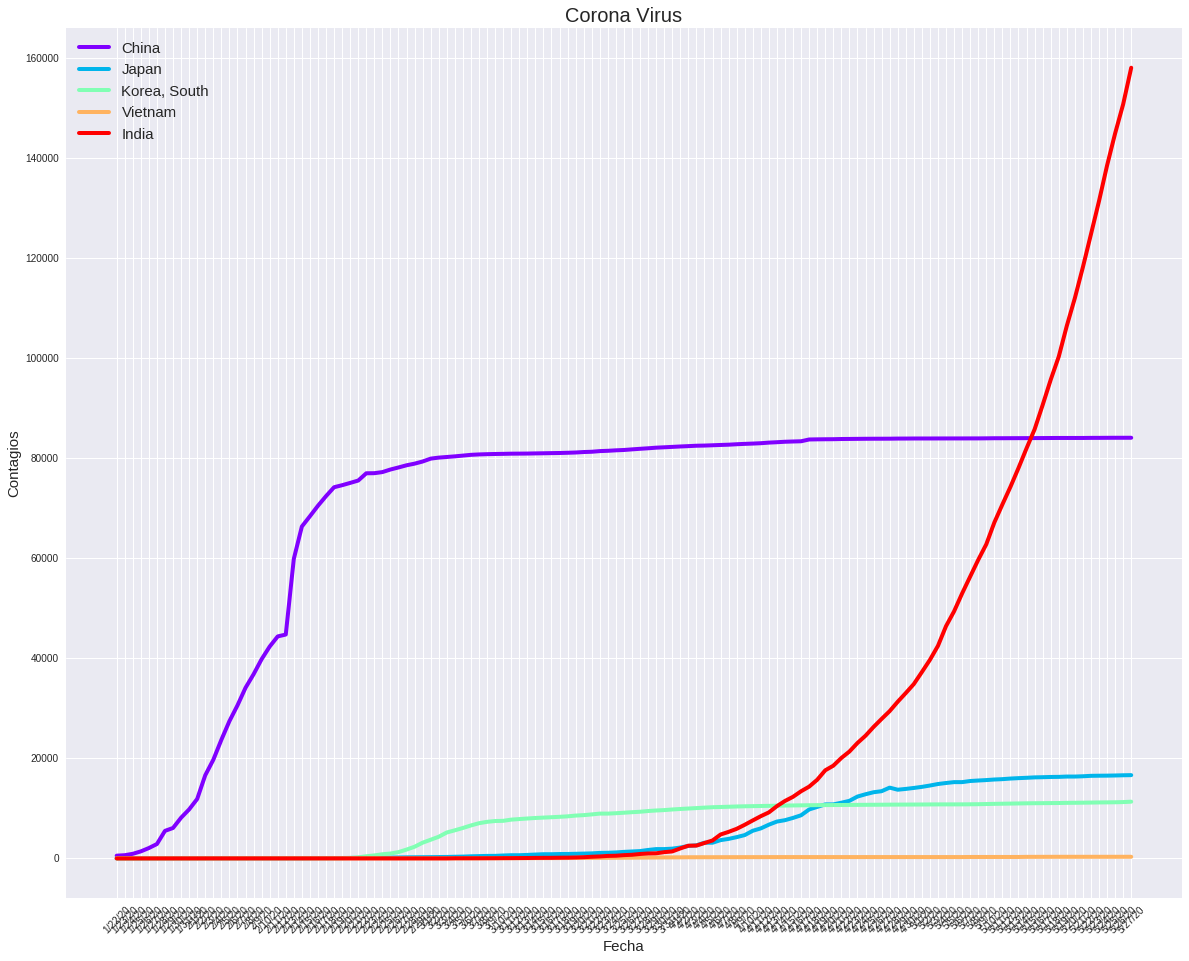

In [28]:
fig=plt.figure(figsize=(20,16)) 
fig=plt.title('Corona Virus',fontsize=20)
fig=plt.xlabel("Fecha",fontsize=15)
fig=plt.ylabel("Contagios",fontsize=15)
fig=plt.xticks(rotation=45)
import matplotlib.cm as cm
#plt.xticks(la.index)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#fig=plt.yscale('log')
paises=['China','Japan','Korea, South','Vietnam','India']
cols= cm.rainbow(np.linspace(0, 1, len(paises))) 
##PONER ETIQUETAS DE LAS FECHAS IMPORTANTES, CUANDO SE PUSIERON CUARENTENAS, PARA OBSERVAR SI SIRVEN EFECTIVAMENTE O NO
for j, c in zip(paises,cols):
        fig=plt.plot(sud_asc[:][j],color=c,linewidth=4.0) #label=i+' LA',
#################################################################################
fig=plt.legend(fontsize=15)

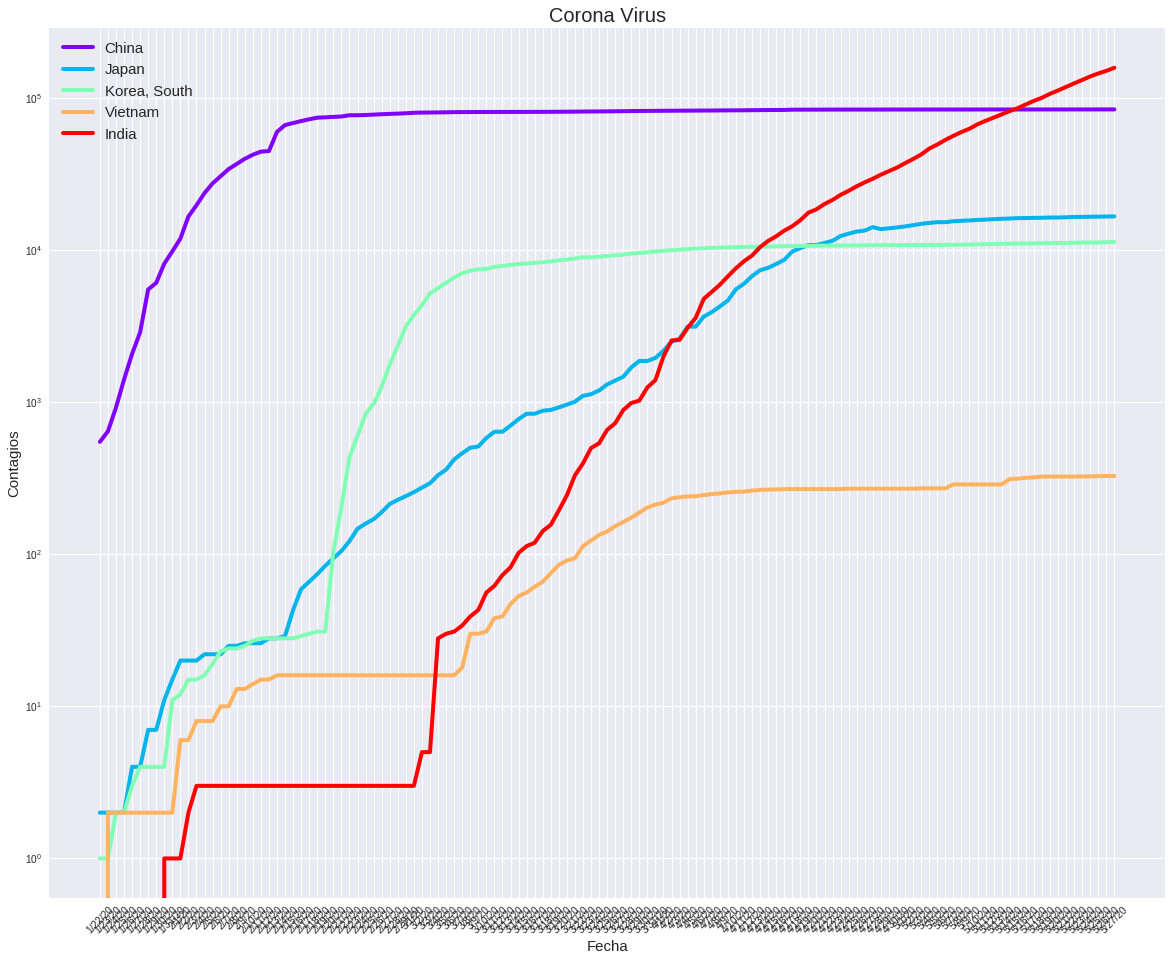

In [29]:
fig=plt.figure(figsize=(20,16)) 
fig=plt.title('Corona Virus',fontsize=20)
fig=plt.xlabel("Fecha",fontsize=15)
fig=plt.ylabel("Contagios",fontsize=15)
fig=plt.xticks(rotation=45)
import matplotlib.cm as cm
#plt.xticks(la.index)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
fig=plt.yscale('log')
paises=['China','Japan','Korea, South','Vietnam','India']
cols= cm.rainbow(np.linspace(0, 1, len(paises))) 
##PONER ETIQUETAS DE LAS FECHAS IMPORTANTES, CUANDO SE PUSIERON CUARENTENAS, PARA OBSERVAR SI SIRVEN EFECTIVAMENTE O NO
for j, c in zip(paises,cols):
        fig=plt.plot(sud_asc[:][j],color=c,linewidth=4.0) #label=i+' LA',
#################################################################################
fig=plt.legend(fontsize=15)

# <center> Europa </center>

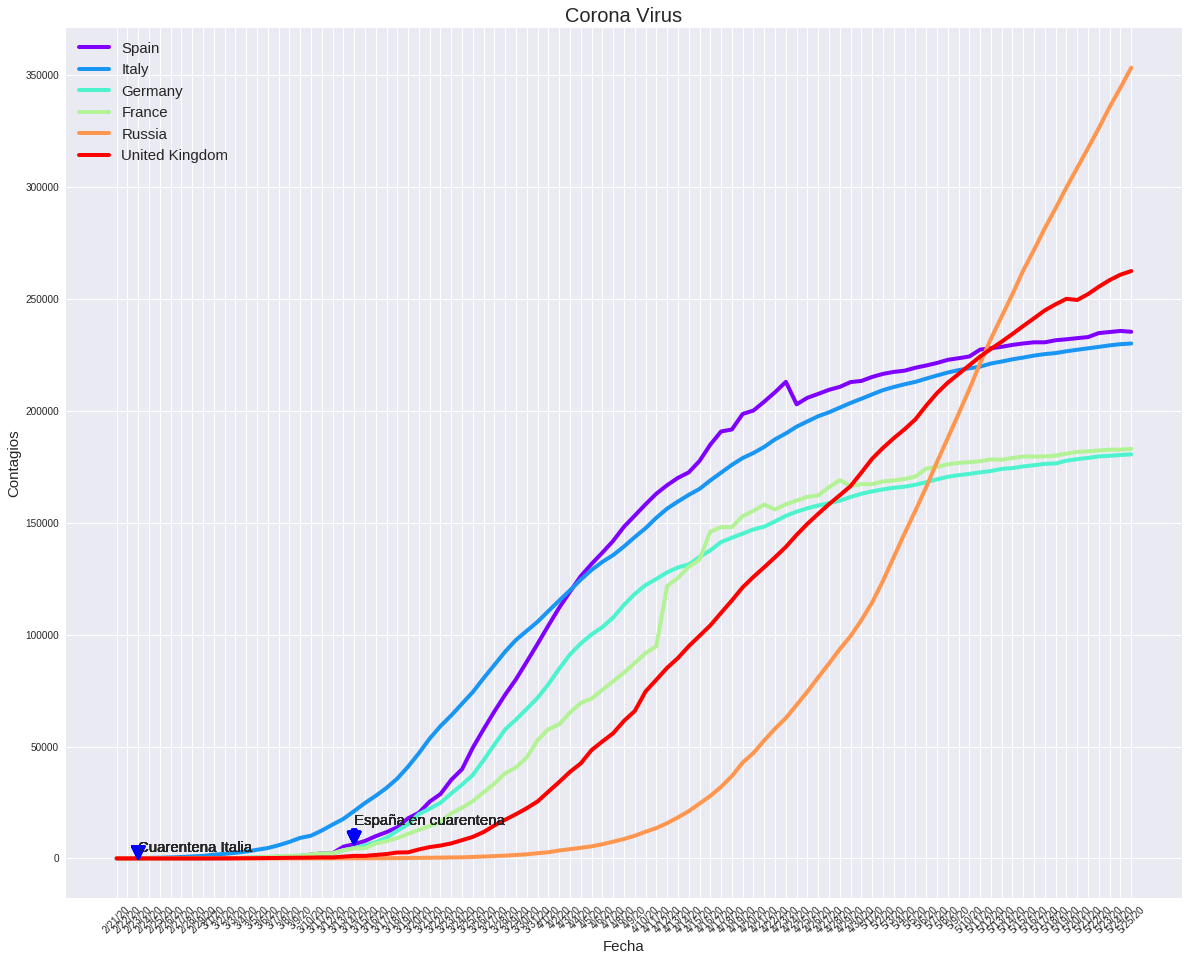

In [30]:
fig=plt.figure(figsize=(20,16)) 
fig=plt.title('Corona Virus',fontsize=20)
fig=plt.xlabel("Fecha",fontsize=15)
fig=plt.ylabel("Contagios",fontsize=15)
fig=plt.xticks(rotation=45)
#plt.xticks(la.index)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#fig=plt.yscale('log')
paises=['Spain','Italy','Germany','France','Russia','United Kingdom']
cols= cm.rainbow(np.linspace(0, 1, len(paises))) 
##PONER ETIQUETAS DE LAS FECHAS IMPORTANTES, CUANDO SE PUSIERON CUARENTENAS, PARA OBSERVAR SI SIRVEN EFECTIVAMENTE O NO
for j, c in zip(paises,cols):
        fig=plt.plot(euroc[30:-2][j],color=c,linewidth=4.0)
        fig=plt.annotate('España en cuarentena',xytext=(22,15000),xy=(22, 6500),size=15,
                arrowprops=dict(
                             color='blue',
                             lw=2.5,
                             ls='-'))
        fig=plt.annotate('Cuarentena Italia',xytext=(2,3000),xy=(2, 30),size=15,
                arrowprops=dict(
                             color='blue',
                             lw=2.5,
                             ls='-'))
fig=plt.legend(fontsize=15)

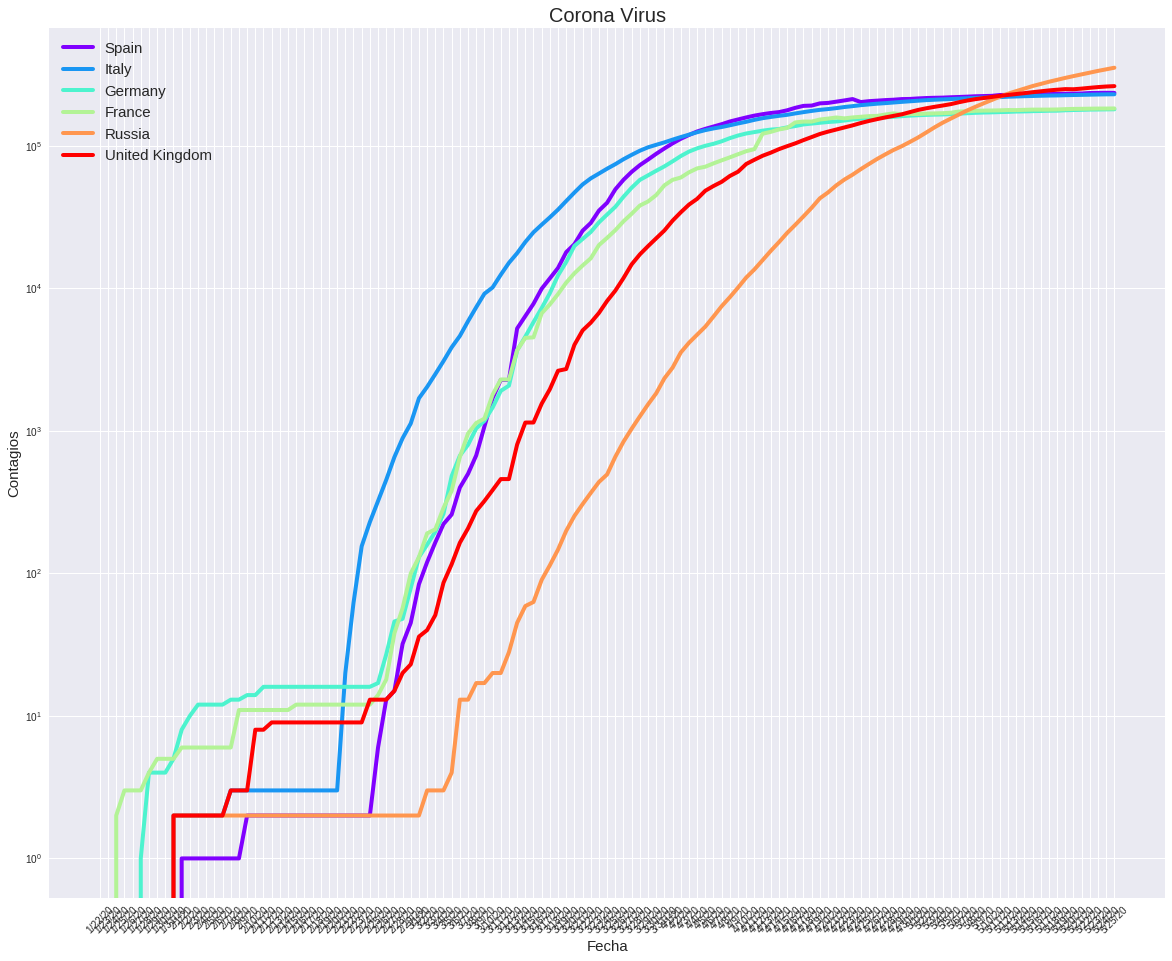

In [31]:
fig=plt.figure(figsize=(20,16)) 
fig=plt.title('Corona Virus',fontsize=20)
fig=plt.xlabel("Fecha",fontsize=15)
fig=plt.ylabel("Contagios",fontsize=15)
fig=plt.xticks(rotation=45)
#plt.xticks(la.index)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
fig=plt.yscale('log')
paises=['Spain','Italy','Germany','France','Russia','United Kingdom']
cols= cm.rainbow(np.linspace(0, 1, len(paises))) 
##PONER ETIQUETAS DE LAS FECHAS IMPORTANTES, CUANDO SE PUSIERON CUARENTENAS, PARA OBSERVAR SI SIRVEN EFECTIVAMENTE O NO
for j, c in zip(paises,cols):
        fig=plt.plot(euroc[:-2][j],color=c,linewidth=4.0)
fig=plt.legend(fontsize=15)

# <center> Medio Oriente </center>


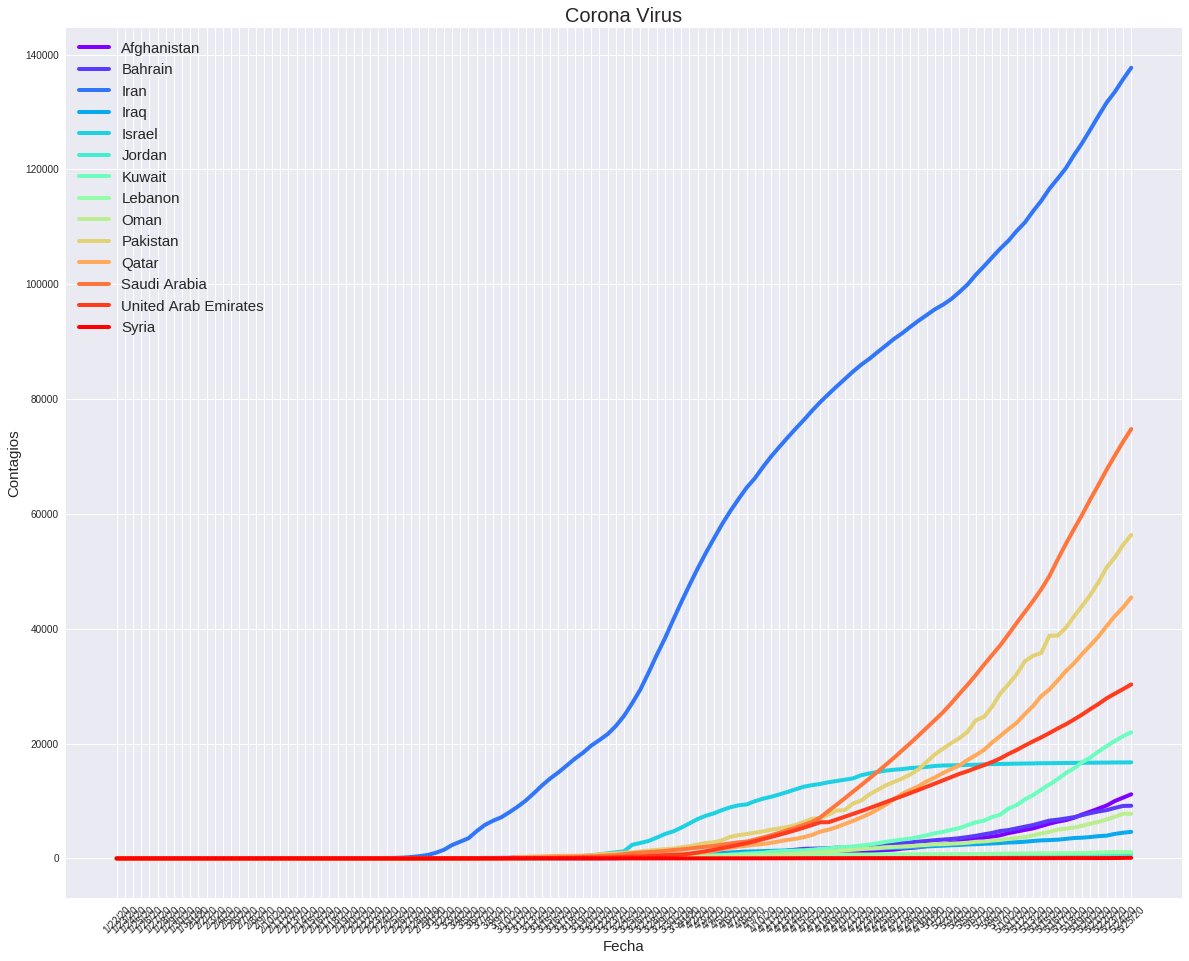

In [32]:
fig=plt.figure(figsize=(20,16)) 
fig=plt.title('Corona Virus',fontsize=20)
fig=plt.xlabel("Fecha",fontsize=15)
fig=plt.ylabel("Contagios",fontsize=15)
fig=plt.xticks(rotation=45)
#plt.xticks(la.index)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#fig=plt.yscale('log')
cols= cm.rainbow(np.linspace(0, 1, medorc.columns.values.shape[0]))

##PONER ETIQUETAS DE LAS FECHAS IMPORTANTES, CUANDO SE PUSIERON CUARENTENAS, PARA OBSERVAR SI SIRVEN EFECTIVAMENTE O NO
for j, c in zip(medorc.columns,cols):
        fig=plt.plot(medorc[:-2][j],color=c,linewidth=4.0) #label=i+' LA',
#################################################################################
fig=plt.legend(fontsize=15)

# <center> África </center>

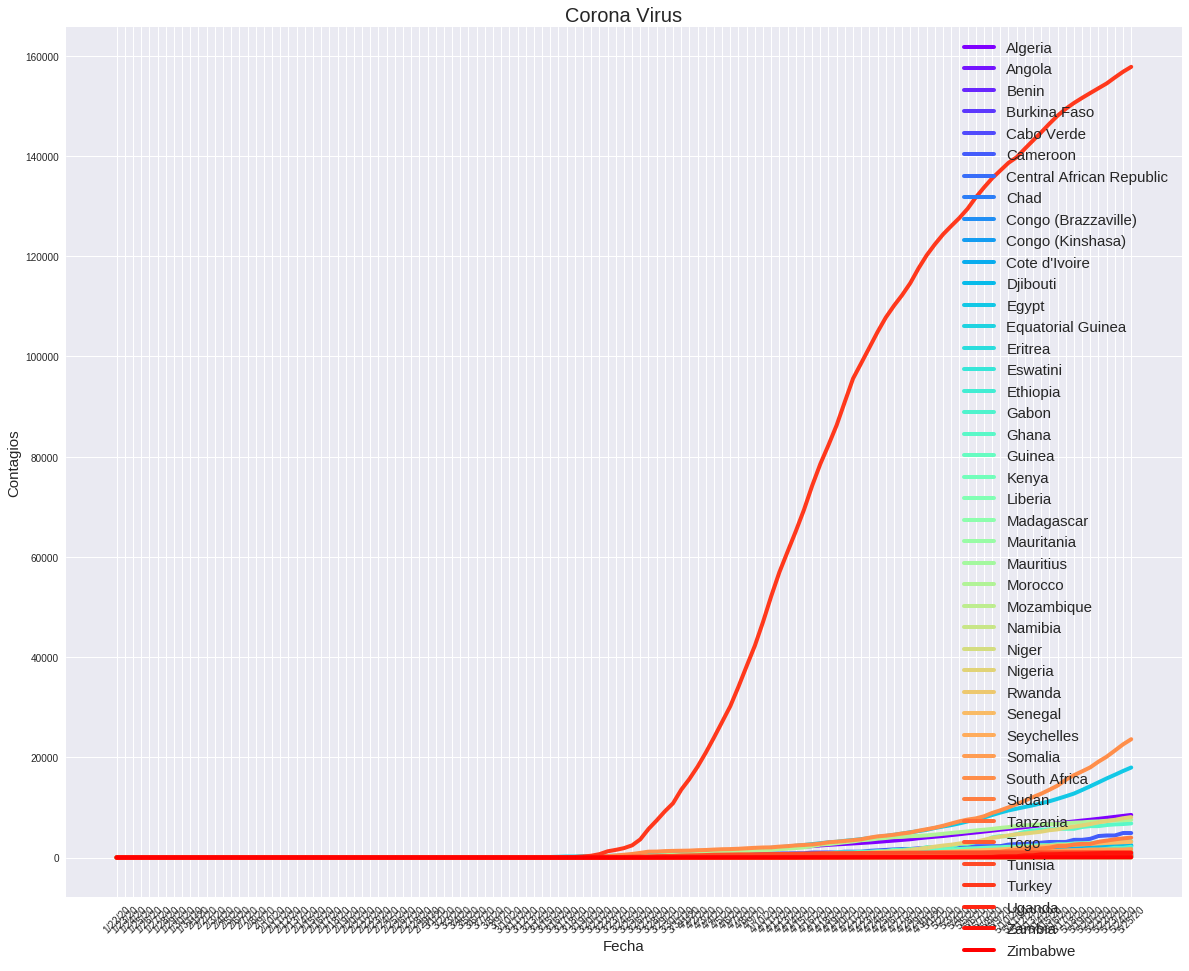

In [33]:
fig=plt.figure(figsize=(20,16)) 
fig=plt.title('Corona Virus',fontsize=20)
fig=plt.xlabel("Fecha",fontsize=15)
fig=plt.ylabel("Contagios",fontsize=15)
fig=plt.xticks(rotation=45)
#plt.xticks(la.index)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#fig=plt.yscale('log')
cols= cm.rainbow(np.linspace(0, 1, africc.columns.values.shape[0]))
##PONER ETIQUETAS DE LAS FECHAS IMPORTANTES, CUANDO SE PUSIERON CUARENTENAS, PARA OBSERVAR SI SIRVEN EFECTIVAMENTE O NO
for j, c in zip(africc.columns,cols):
        fig=plt.plot(africc[:-2][j],color=c,linewidth=4.0) #label=i+' LA',
#################################################################################
fig=plt.legend(fontsize=15)

# <center> Oceanía </center>

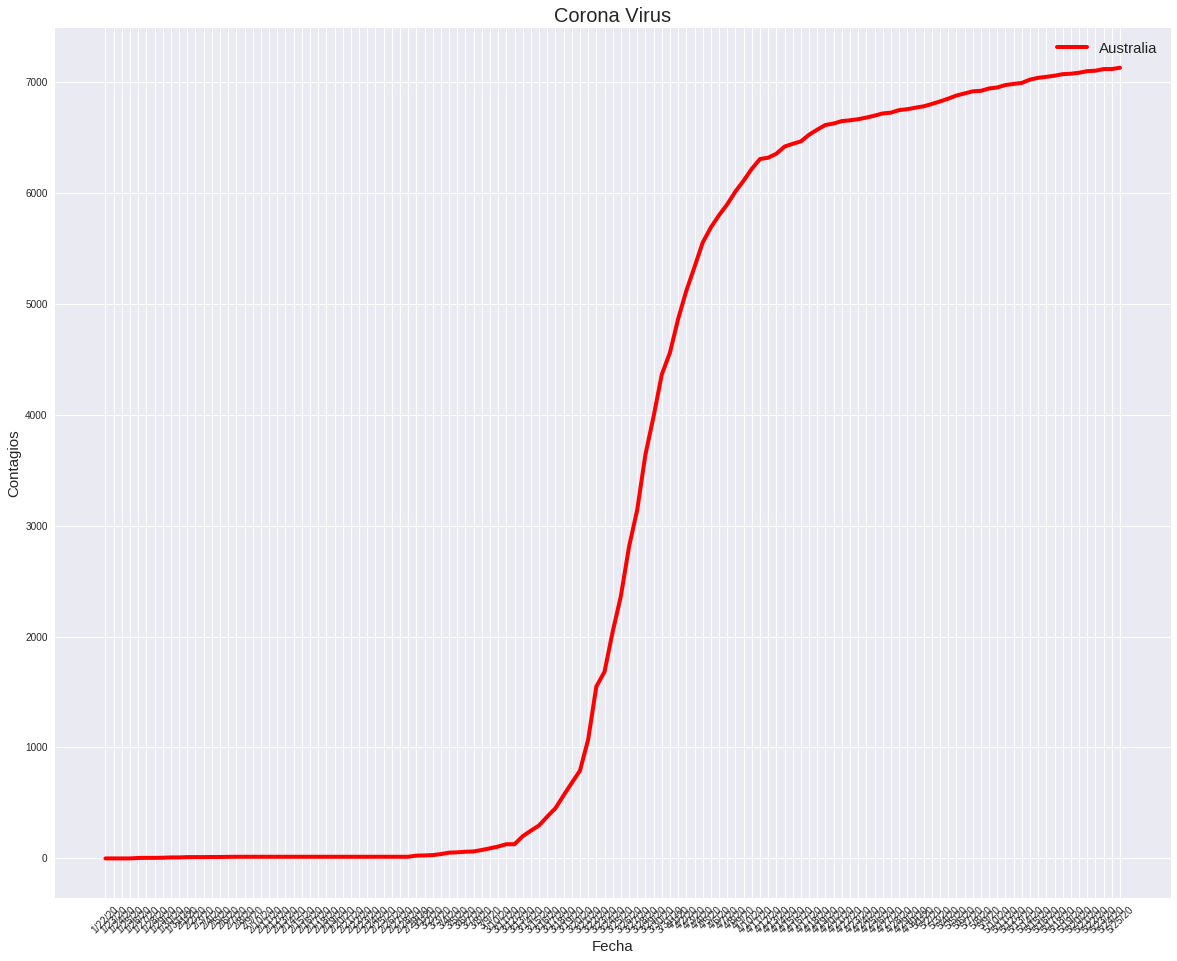

In [34]:
fig=plt.figure(figsize=(20,16)) 
fig=plt.title('Corona Virus',fontsize=20)
fig=plt.xlabel("Fecha",fontsize=15)
fig=plt.ylabel("Contagios",fontsize=15)
fig=plt.xticks(rotation=45)
#plt.xticks(la.index)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#fig=plt.yscale('log')
cols=  itertools.cycle(["r", "b", "g"])

##PONER ETIQUETAS DE LAS FECHAS IMPORTANTES, CUANDO SE PUSIERON CUARENTENAS, PARA OBSERVAR SI SIRVEN EFECTIVAMENTE O NO
for j, c in zip(oceaniac.columns,cols):
        fig=plt.plot(oceaniac[:-2][j],color=c,linewidth=4.0) #label=i+' LA',
#################################################################################
fig=plt.legend(fontsize=15)

# <center> Otros </center>

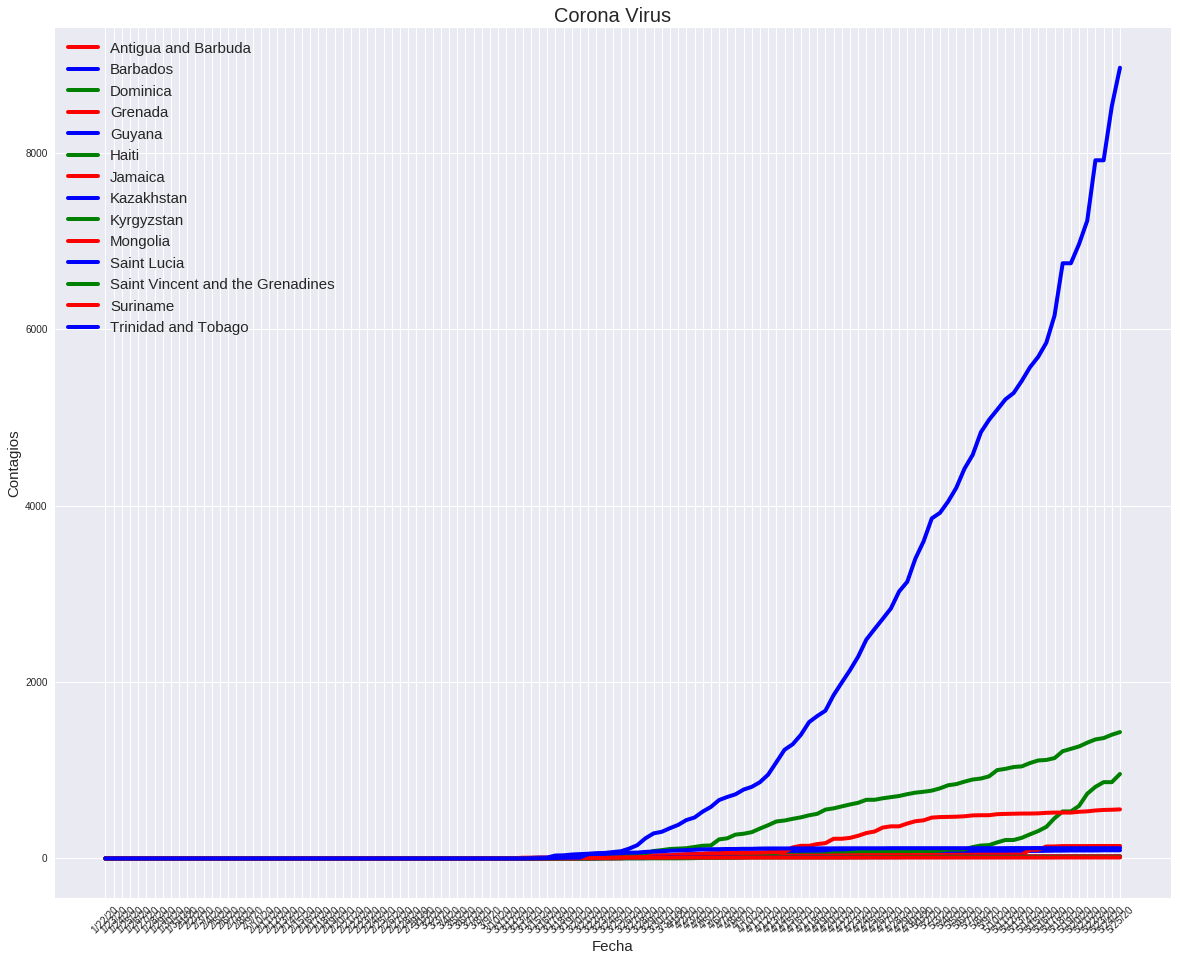

In [35]:
fig=plt.figure(figsize=(20,16)) 
fig=plt.title('Corona Virus',fontsize=20)
fig=plt.xlabel("Fecha",fontsize=15)
fig=plt.ylabel("Contagios",fontsize=15)
fig=plt.xticks(rotation=45)
#plt.xticks(la.index)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#fig=plt.yscale('log')
cols=  itertools.cycle(["r", "b", "g"])

##PONER ETIQUETAS DE LAS FECHAS IMPORTANTES, CUANDO SE PUSIERON CUARENTENAS, PARA OBSERVAR SI SIRVEN EFECTIVAMENTE O NO
for j, c in zip(otrosc.columns,cols):
        fig=plt.plot(otrosc[:-2][j],color=c,linewidth=4.0) #label=i+' LA',
#################################################################################
fig=plt.legend(fontsize=15)

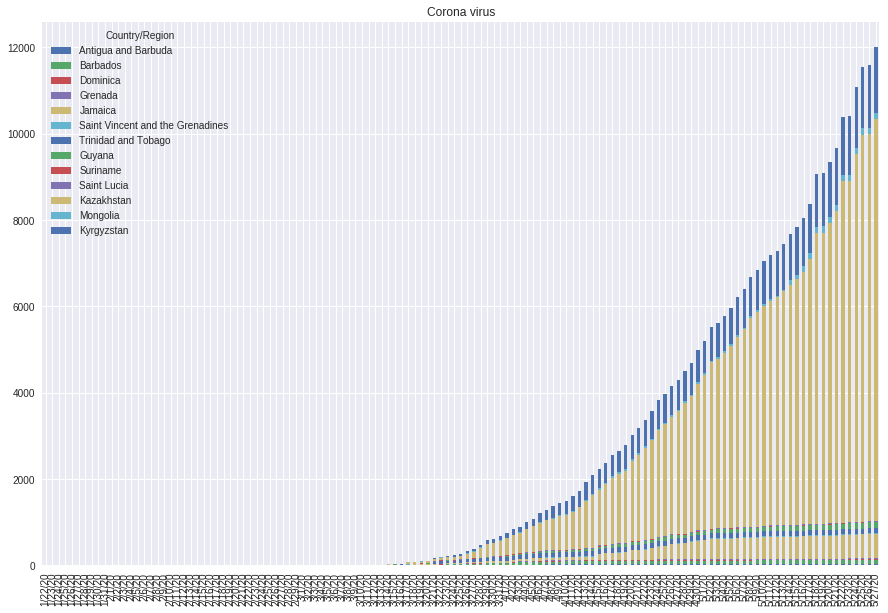

In [36]:
fig=otrosc[['Antigua and Barbuda', 'Barbados','Dominica' ,'Grenada','Jamaica' ,'Saint Vincent and the Grenadines','Trinidad and Tobago','Guyana' ,'Suriname', 'Saint Lucia',  'Kazakhstan' , 'Mongolia','Kyrgyzstan' ]].plot.bar(stacked=True,figsize=(15,10),title ='Corona virus',fontsize=10)

# <center> Casos particulares</center>

## España

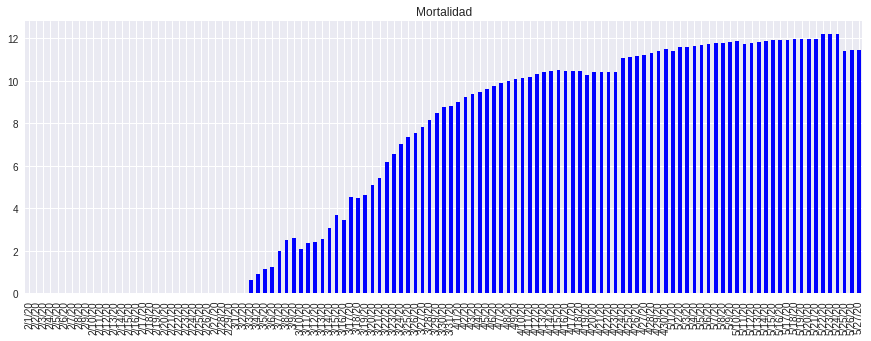

In [37]:
((eurod['Spain']/euroc['Spain']).dropna()*100).plot.bar(title='Mortalidad',color='blue',figsize=(15,5))

## Italia

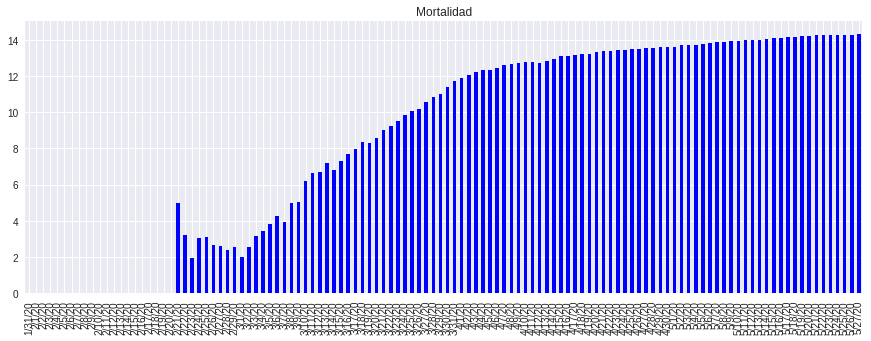

In [38]:
((eurod['Italy']/euroc['Italy']).dropna()*100).plot.bar(title='Mortalidad',color='blue',figsize=(15,5))

## Francia

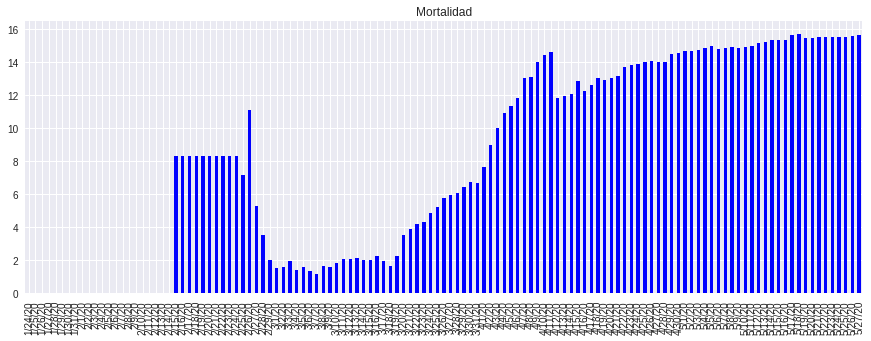

In [39]:
((eurod['France']/euroc['France']).dropna()*100).plot.bar(title='Mortalidad',color='blue',figsize=(15,5))

## Alemania

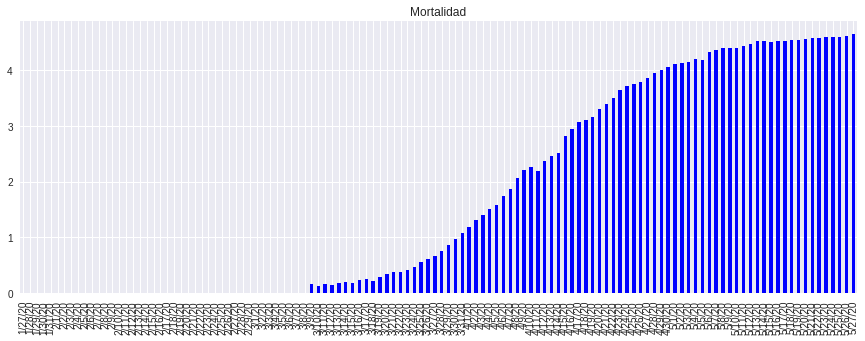

In [40]:
((eurod['Germany']/euroc['Germany']).dropna()*100).plot.bar(title='Mortalidad',color='blue',figsize=(15,5))

## México

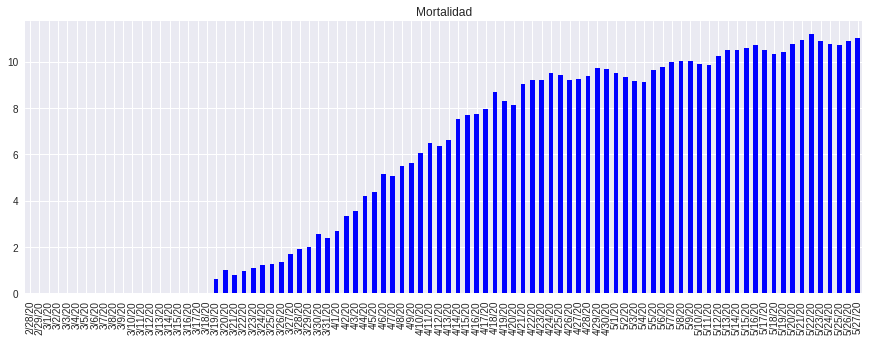

In [41]:
((lad['Mexico']/lac['Mexico']).dropna()*100).plot.bar(title='Mortalidad',color='blue',figsize=(15,5))

## Ecuador

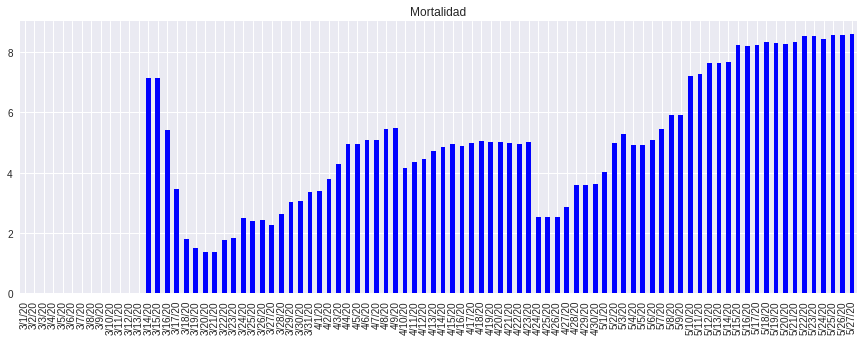

In [42]:
((lad['Ecuador']/lac['Ecuador']).dropna()*100).plot.bar(title='Mortalidad',color='blue',figsize=(15,5))

## Argentina

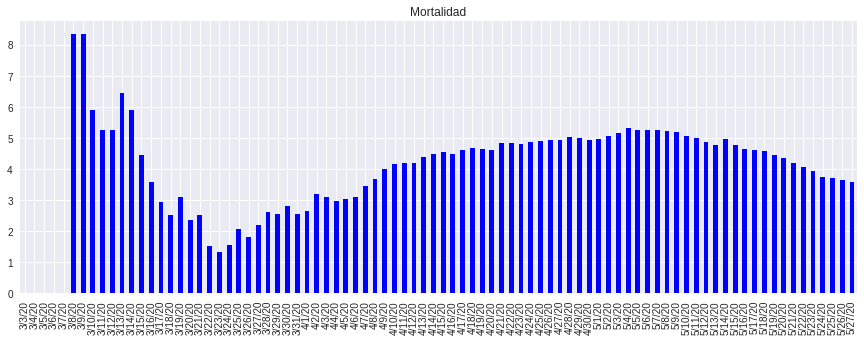

In [43]:
((lad['Argentina']/lac['Argentina']).dropna()*100).plot.bar(title='Mortalidad',color='blue',figsize=(15,5))

## Brasil

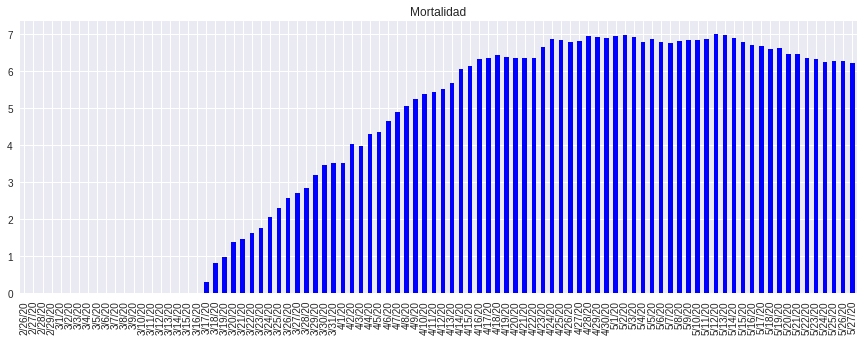

In [44]:
((lad['Brazil']/lac['Brazil']).dropna()*100).plot.bar(title='Mortalidad',color='blue',figsize=(15,5))

## Chile

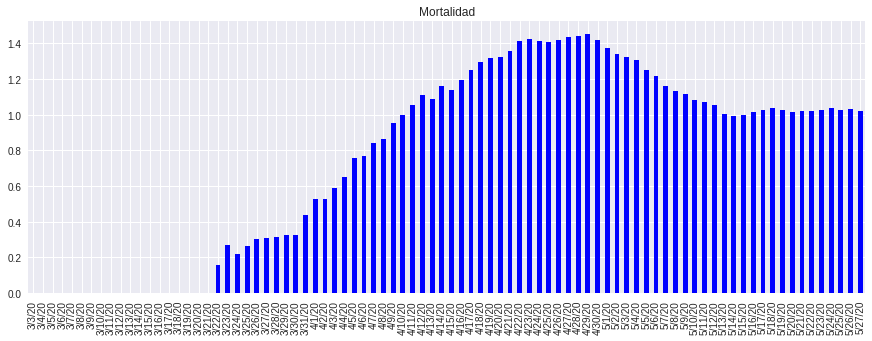

In [45]:
((lad['Chile']/lac['Chile']).dropna()*100).plot.bar(title='Mortalidad',color='blue',figsize=(15,5))

## Colombia

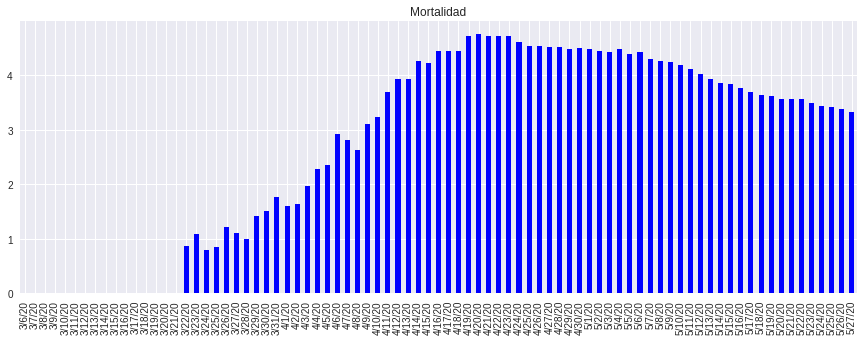

In [46]:
((lad['Colombia']/lac['Colombia']).dropna()*100).plot.bar(title='Mortalidad',color='blue',figsize=(15,5))

## Estados Unidos

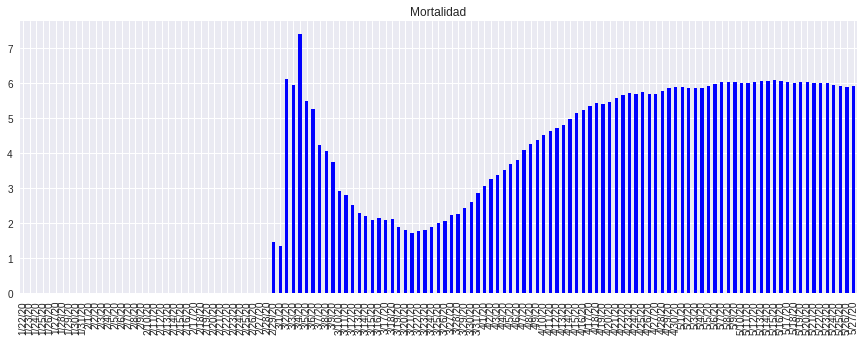

In [47]:
((noramd['US']/noramc['US']).dropna()*100).plot.bar(title='Mortalidad',color='blue',figsize=(15,5))

## China

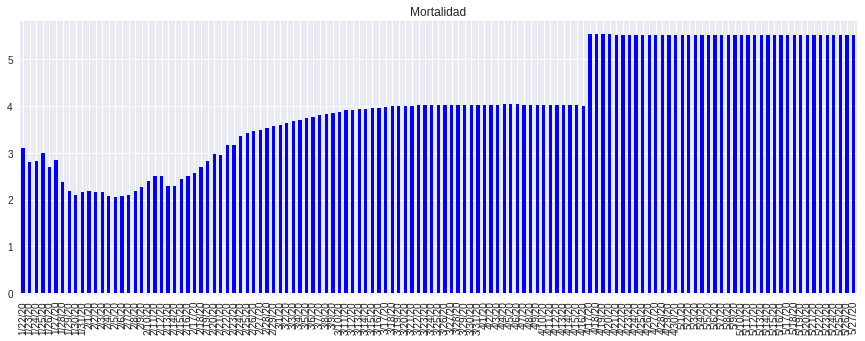

In [48]:
((sud_asd['China']/sud_asc['China']).dropna()*100).plot.bar(title='Mortalidad',color='blue',figsize=(15,5))

## Corea del Sur

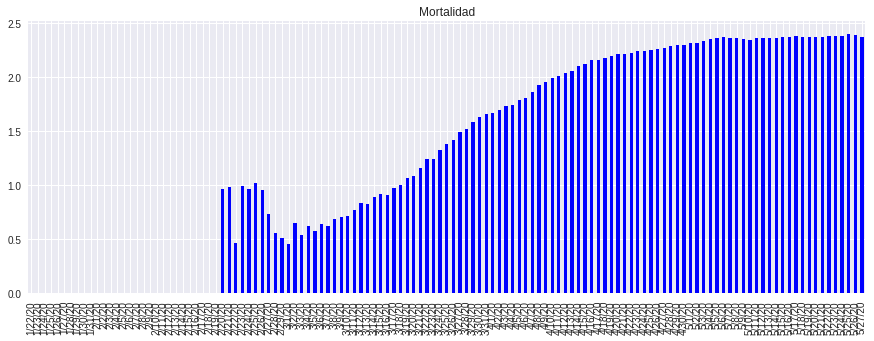

In [49]:
((sud_asd['Korea, South']/sud_asc['Korea, South']).dropna()*100).plot.bar(title='Mortalidad',color='blue',figsize=(15,5))

## Japón

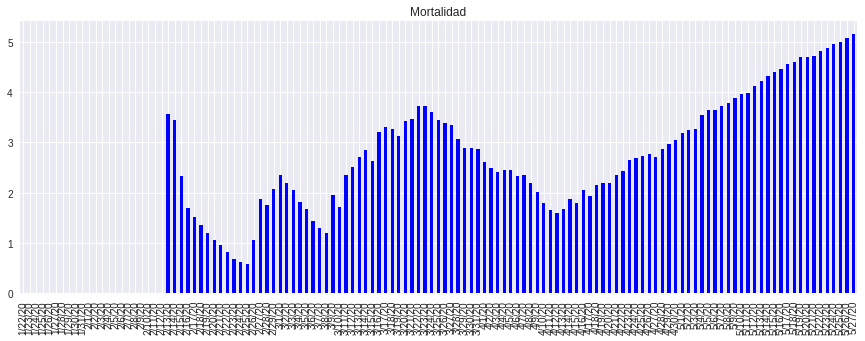

In [50]:
((sud_asd['Japan']/sud_asc['Japan']).dropna()*100).plot.bar(title='Mortalidad',color='blue',figsize=(15,5))

## <center> Tasas de mortalidad por continente </center>

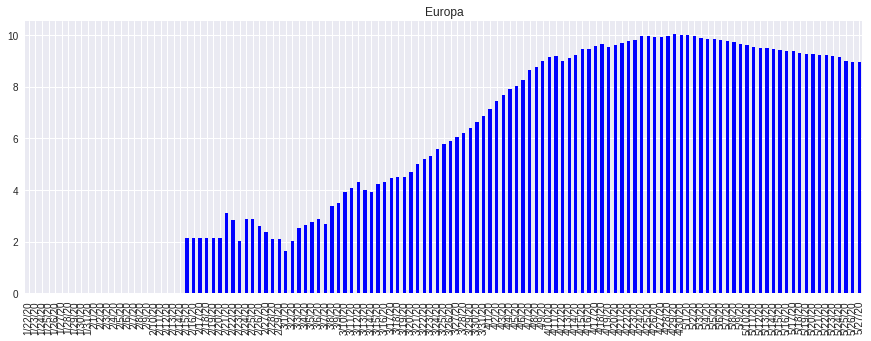

In [51]:
(muertos['Europa']/corona['Europa']*100).plot.bar(title='Europa',color='blue',figsize=(15,5))

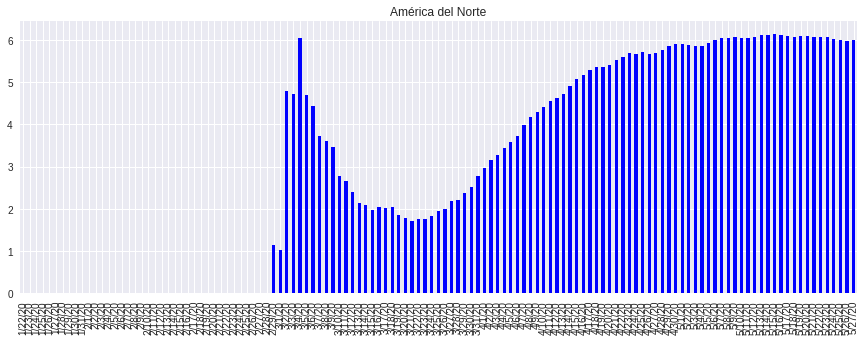

In [52]:
(muertos['América del Norte']/corona['América del Norte']*100).plot.bar(title='América del Norte',color='blue',figsize=(15,5))

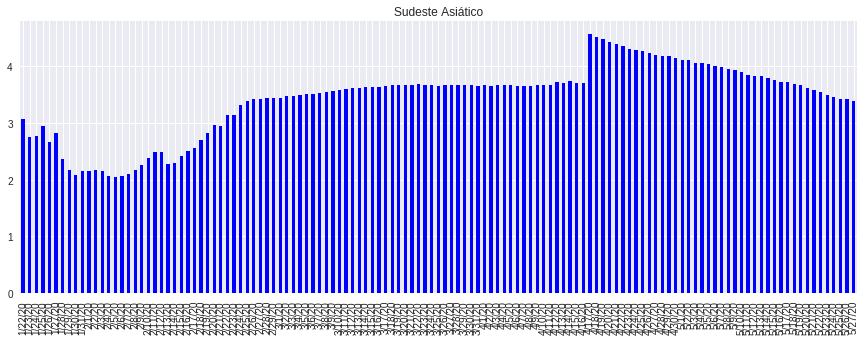

In [53]:
(muertos['Sudeste Asiático']/corona['Sudeste Asiático']*100).plot.bar(title='Sudeste Asiático',color='blue',figsize=(15,5))

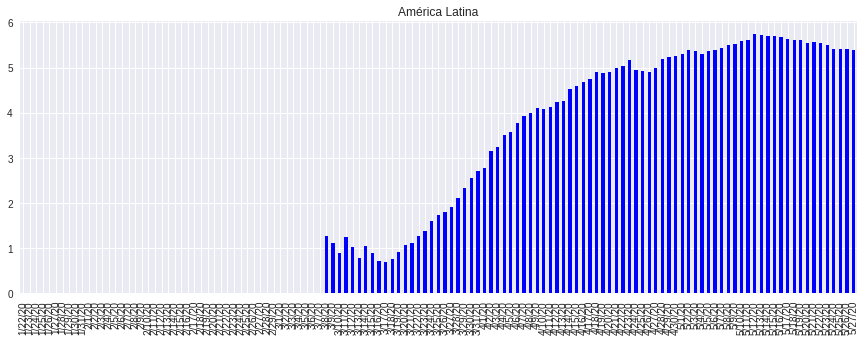

In [54]:
(muertos['América Latina']/corona['América Latina']*100).plot.bar(title='América Latina',color='blue',figsize=(15,5))

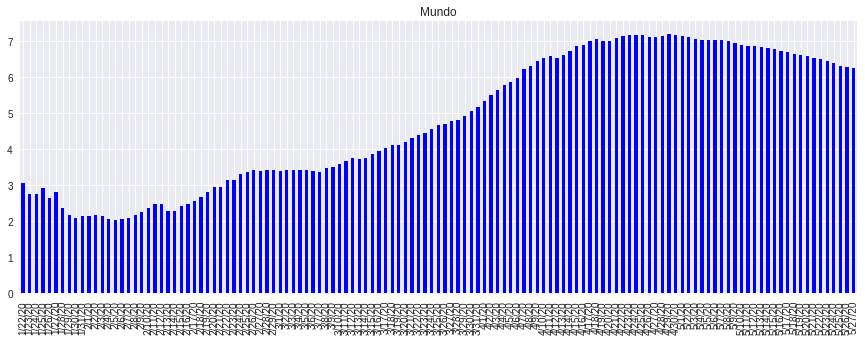

In [55]:
(muertos.sum(axis=1)/corona.sum(axis=1)*100).plot.bar(title='Mundo',color='blue',figsize=(15,5))

<Figure size 576x396 with 0 Axes>

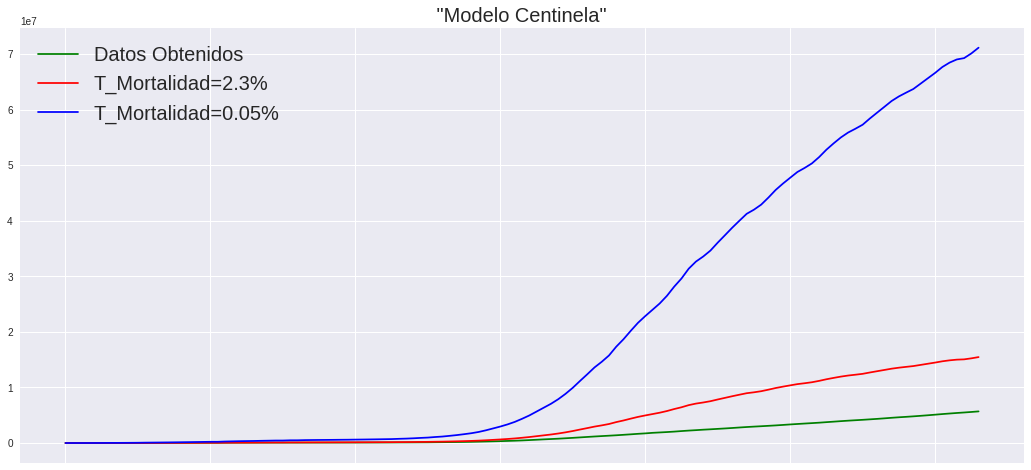

In [56]:
fig=plt.figure()
fig=plt.figure(figsize=(18,8)) 
fig=plt.title(' "Modelo Centinela" ',fontsize=20)

fig=corona.sum(axis=1).plot(label="Datos Obtenidos",color='green')
#fig=pd.DataFrame(muertos.sum(axis=1)/0.023, columns=['Estimación']).plot()

fig=((muertos.sum(axis=1))/0.023).plot(label="T_Mortalidad=2.3%", color='red')
fig=((muertos.sum(axis=1))/0.005).plot(label="T_Mortalidad=0.05%", color='blue')
fig=plt.legend(fontsize=20)

## <center> Graficando todos los países </center>

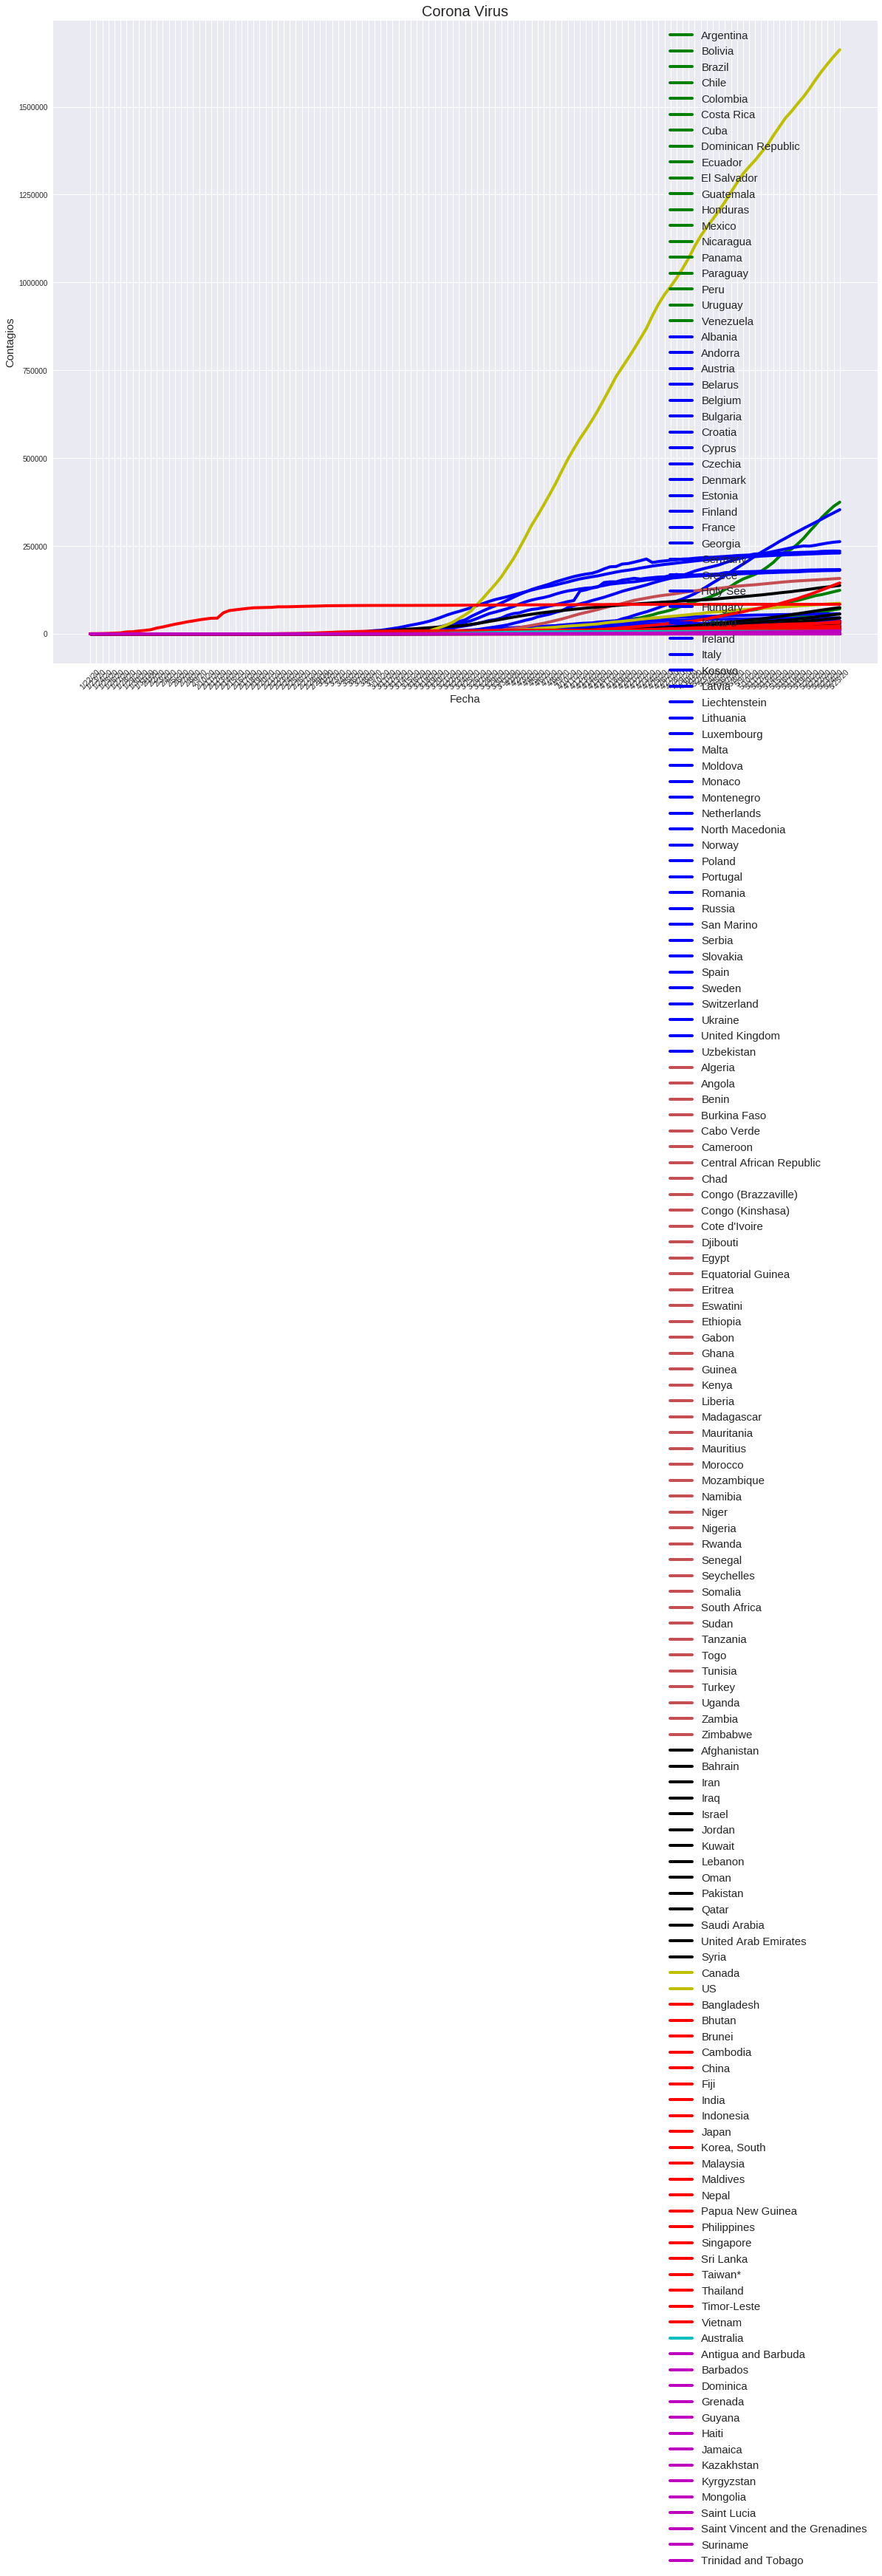

In [57]:
fig=plt.figure(figsize=(20,16)) 
fig=plt.title('Corona Virus',fontsize=20)
fig=plt.xlabel("Fecha",fontsize=15)
fig=plt.ylabel("Contagios",fontsize=15)
fig=plt.xticks(rotation=45)
#plt.xticks(la.index)
#plt.xticks(fontsize=15)
#plt.yticks(fontsize=15)
#fig=plt.yscale('log')
continentes=[lac,euroc,africc,medorc,noramc,sud_asc,oceaniac,otrosc]
##PONER ETIQUETAS DE LAS FECHAS IMPORTANTES, CUANDO SE PUSIERON CUARENTENAS, PARA OBSERVAR SI SIRVEN EFECTIVAMENTE O NO
for i in continentes:  #COLOR QUE DEPENDA DEL CONTINENTE; PINTA TODOS LOS PAISES DEPENDIENDO DEL CONTINENTE EL COLOR
    for j in i.columns:
        fig=plt.plot(i[:-2][j],  color=col_dic[i.name],linewidth=4.0) #label=i+' LA',
#################################################################################
fig=plt.legend(fontsize=15)

# <center> Comparando la evolución de la propagación </center>

El primer punto de cada curva es el primer día en que en ése país se superaron los 500 casos confirmados. De esta manera se busca eliminar el "desfase" y se analiza en simultáneo la evolución.

<Figure size 576x396 with 0 Axes>

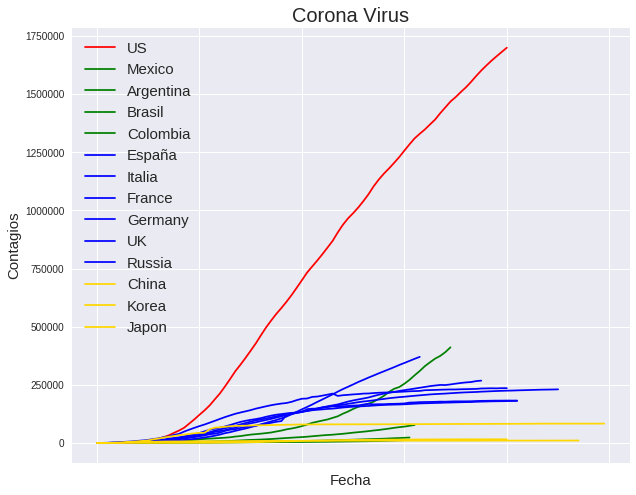

In [58]:
min=0
max=100

fig=plt.figure()
fig=plt.figure(figsize=(10,8)) 
fig=plt.title('Corona Virus',fontsize=20)
fig=plt.xlabel("Fecha",fontsize=15)
fig=plt.ylabel("Contagios",fontsize=15)
fig=plt.xticks(rotation=45)
cols= cm.rainbow(np.linspace(0, 1, 10))
noramc['US'].copy()[noramc['US']>500][min:max].plot(label="US",color='red')
lac['Mexico'].copy()[lac['Mexico']>500][min:max].plot(label="Mexico",color='green')
lac['Argentina'].copy()[lac['Argentina']>500][min:max].plot(label="Argentina",color='green')
lac['Brazil'].copy()[lac['Brazil']>500][min:max].plot(label="Brasil",color='green')
lac['Colombia'].copy()[lac['Colombia']>500][min:max].plot(label="Colombia",color='green')
euroc['Spain'].copy()[euroc['Spain']>500][min:max].plot(label="España",color='blue')
euroc['Italy'].copy()[euroc['Italy']>500][min:max].plot(label="Italia",color='blue')
euroc['France'].copy()[euroc['France']>500][min:max].plot(label="France",color='blue')
euroc['Germany'].copy()[euroc['Germany']>500][min:max].plot(label="Germany",color='blue')
euroc['United Kingdom'].copy()[euroc['United Kingdom']>500][min:max].plot(label="UK",color='blue')
euroc['Russia'].copy()[euroc['Russia']>500][min:max].plot(label="Russia",color='blue')

sud_asc['China'].copy()[sud_asc['China']>500][min:max].plot(label="China",color='gold')
sud_asc['Korea, South'].copy()[sud_asc['Korea, South']>500][min:max].plot(label="Korea",color='gold')
sud_asc['Japan'].copy()[sud_asc['Japan']>500][min:max].plot(label="Japon",color='gold')
fig=plt.legend(fontsize=15)


# <center> Casos nuevos  </center>

In [59]:
us=noramc['US'].copy()[noramc['US']>500]
mx=lac['Mexico'].copy()[lac['Mexico']>500]
cl=lac['Chile'].copy()[lac['Chile']>500]
ec=lac['Ecuador'].copy()[lac['Ecuador']>500]
ar=lac['Argentina'].copy()[lac['Argentina']>500]
br=lac['Brazil'].copy()[lac['Brazil']>500]
co=lac['Colombia'].copy()[lac['Colombia']>500]
es=euroc['Spain'].copy()[euroc['Spain']>500]
it=euroc['Italy'].copy()[euroc['Italy']>500]
cn=sud_asc['China'].copy()[sud_asc['China']>500]
ko=sud_asc['Korea, South'].copy()[sud_asc['Korea, South']>500]
jp=sud_asc['Japan'].copy()[sud_asc['Japan']>500]

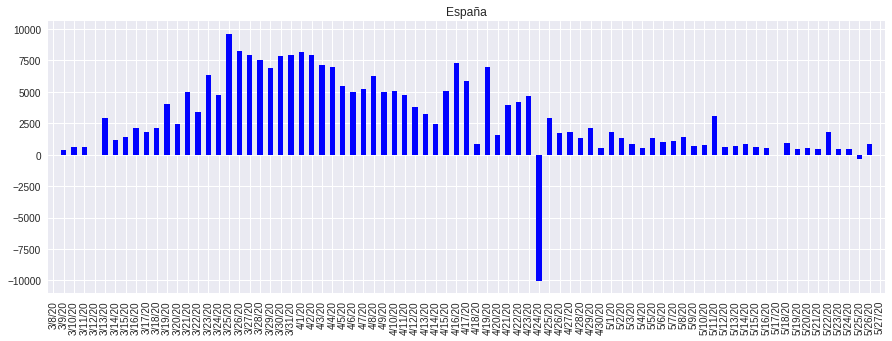

In [60]:
(es-es.shift(1)).plot(kind="bar",color="blue",title='España',figsize=(15,5))

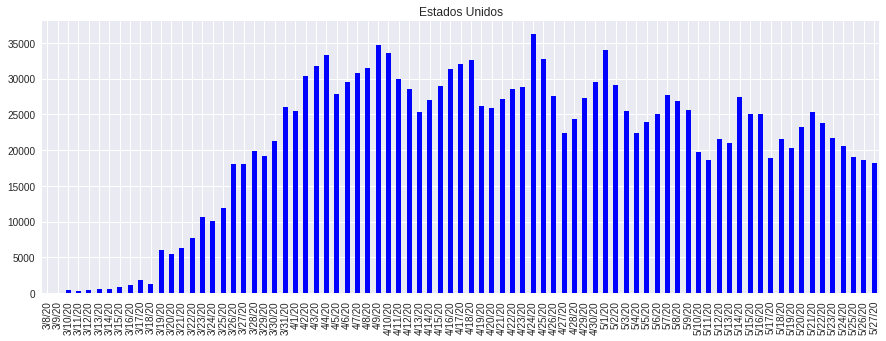

In [61]:
(us-us.shift(1)).plot(kind="bar",color="blue",title='Estados Unidos',figsize=(15,5))

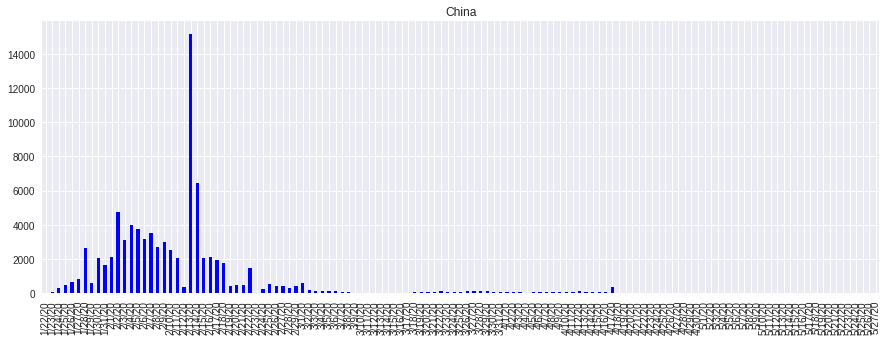

In [62]:
(cn-cn.shift(1)).plot(kind="bar",color="blue",title='China',figsize=(15,5))

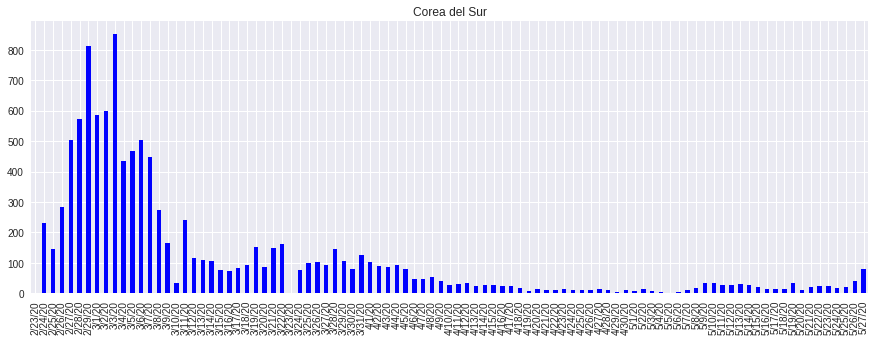

In [63]:
(ko-ko.shift(1)).plot(kind="bar",color="blue",figsize=(15,5),title='Corea del Sur')

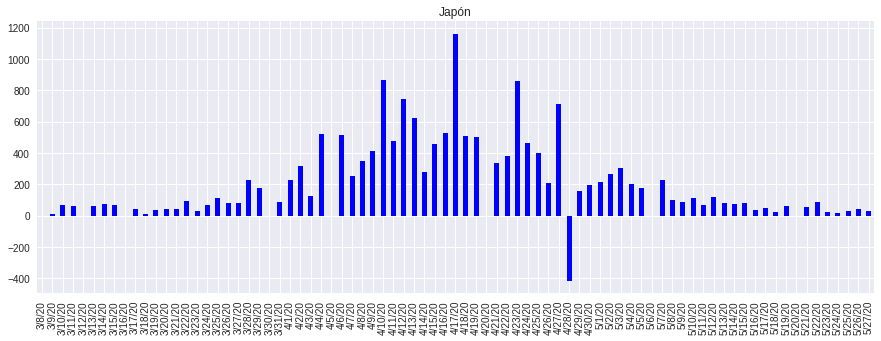

In [64]:
(jp-jp.shift(1)).plot(kind="bar",color="blue",figsize=(15,5),title='Japón')

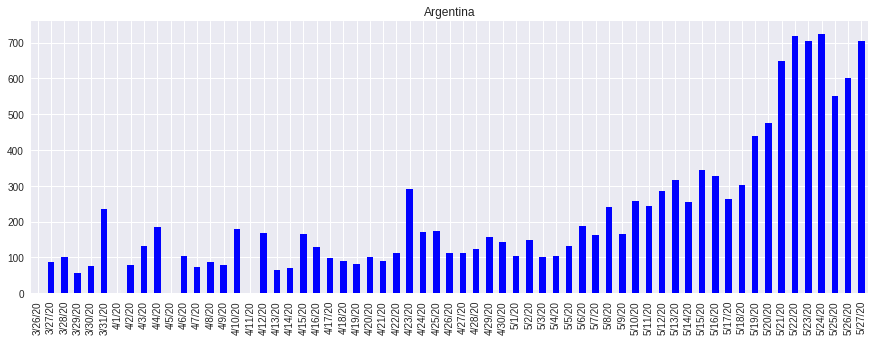

In [65]:
(ar-ar.shift(1)).plot(kind="bar",color="blue",figsize=(15,5),title='Argentina')

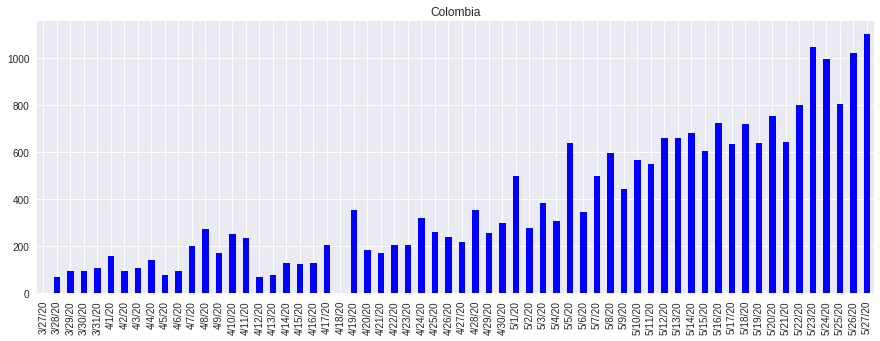

In [66]:
(co-co.shift(1)).plot(kind="bar",color="blue",figsize=(15,5),title='Colombia')

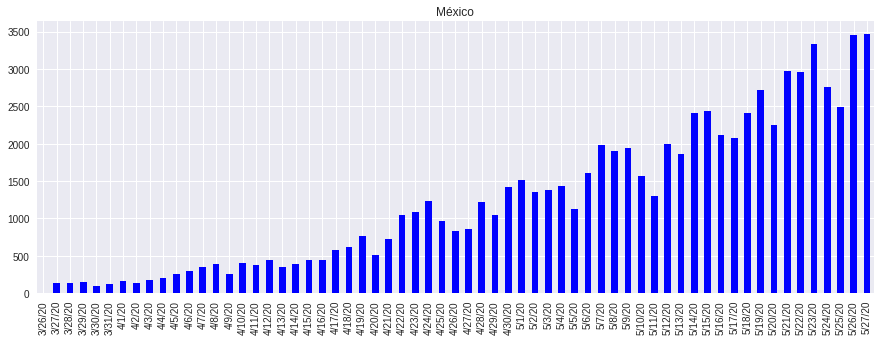

In [67]:
(mx-mx.shift(1)).plot(kind="bar",color="blue",figsize=(15,5),title='México')

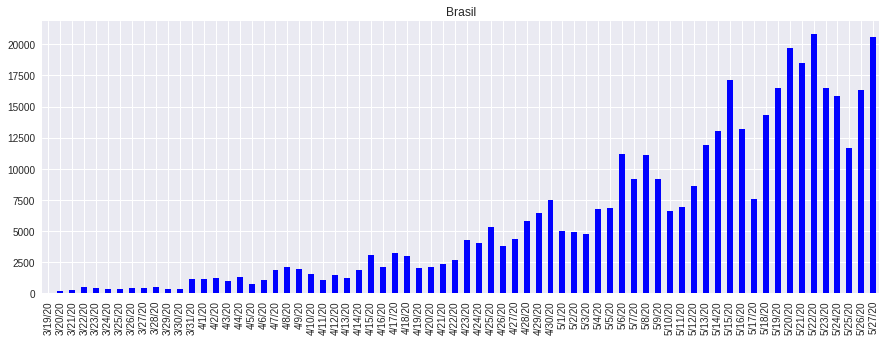

In [68]:
(br-br.shift(1)).plot(kind="bar",color="blue",figsize=(15,5),title='Brasil')

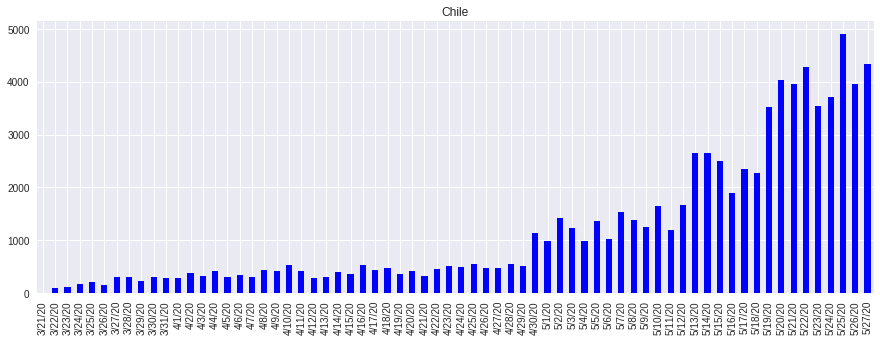

In [69]:
(cl-cl.shift(1)).plot(kind="bar",color="blue",figsize=(15,5),title='Chile')

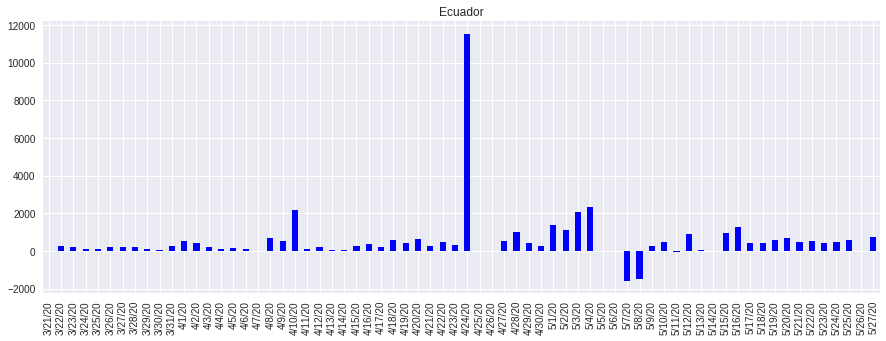

In [70]:
(ec-ec.shift(1)).plot(kind="bar",color="blue",figsize=(15,5),title='Ecuador')

In [71]:
np.log10(corona['5/23/20']).plot()


KeyError: '5/23/20'

In [ ]:
from pylab import *
#pylab importa numpy como np y pyplot de matplotlib como plt.

from ipywidgets import interact, interact_manual, interactive, fixed
import ipywidgets as widgets

fechas=[]
for i in range(2,4):
    for j in range(1,30):
        fecha=""
        fecha=fecha+str(i)+"/"+str(j)+"/20"
        fechas.append(fecha)
@interact(
Fecha =   widgets.IntSlider(min=0, max=len(fechas), step=1, value=0),
## ACA PONTE EL TIMESTAMP
)
def dibuja(Fecha):
    mundo=folium.Map(location=[0,0],zoom_start=2)
    for i in range(0,corona.shape[0]):  # Desde 0 hasta el tamaño del df terremotos
        folium.Circle( 
        location=[corona.iloc[i]['Lat'], corona.iloc[i]['Long']],
        #popup=fechas.iloc[i],# Quería ponerle etiquetas a cada círculo cada una con la fecha y hora pero no salió :(
        radius=2**(np.log(corona.iloc[i][fechas[Fecha]])/np.log(2)), # El radio va exponencialmente, intenté lineal
                                                         # pero no se notaba diferencia entre círculos
        color='crimson',
        fill=True,
        fill_color='crimson'
         ).add_to(mundo)
    mundo
